In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Caminho para a pasta "TCC"
tcc_directory = os.path.join("A:\\UFSC\\TCC")

# Caminho para a pasta "Shared_VM" dentro da pasta "TCC"
shared_vm_directory = os.path.join(tcc_directory, "Shared_VM")

scenarios = os.listdir(shared_vm_directory)

error_count = {}

for scenario in scenarios:
    error_count[scenario] = 0

# Functions definitions

In [3]:
def hitratio_calc (hitmiss_path, scenario):
    # Listas para armaZCnar os textos e os timestamps
    textos = []
    timestamps = []

    # Abra o arquivo de texto em modo de leitura
    with open(hitmiss_path, 'r') as hitmiss_file:
        # Itere pelas linhas do arquivo
        for linha_num, linha in enumerate(hitmiss_file, start=1):
            # Divida cada linha em duas partes usando a vírgula como separador
            partes = linha.strip().split(',')
            
            # Verifique se há exatamente duas partes
            if len(partes) == 2:
                # Adicione o texto à lista de textos e o timestamp à lista de timestamps
                textos.append(partes[0])
                timestamps.append(float(partes[1]))  # Converta o timestamp para float se necessário
            else:
                # Se a linha não tiver duas partes, imprima um erro com o texto da linha
                print(f"Erro ({hitmiss_path}) na linha {linha_num}: {linha}")
                global error_count
                error_count[scenario] += 1
    
    # Count the number of hits and misses
    hits = textos.count("hit")
    misses = textos.count("miss")

    return [hits, misses, hits * 100 / (hits + misses)]

In [4]:
def serverload_calc (server_load_path, sent_requests, scenario):
    # Listas para armaZCnar os textos e os timestamps
    textos = []
    timestamps = []

    # Abra o arquivo de texto em modo de leitura
    with open(server_load_path, 'r') as server_load_file:
        # Itere pelas linhas do arquivo
        for linha_num, linha in enumerate(server_load_file, start=1):
            # Divida cada linha em duas partes usando a vírgula como separador
            partes = linha.strip().split(',')
            
            # Verifique se há exatamente duas partes
            if len(partes) == 2:
                # Adicione o texto à lista de textos e o timestamp à lista de timestamps
                textos.append(partes[0])
                timestamps.append(float(partes[1]))  # Converta o timestamp para float se necessário
            else:
                # Se a linha não tiver duas partes, imprima um erro com o texto da linha
                print(f"Erro ({server_load_path}) na linha {linha_num}: {linha}")
                global error_count
                error_count[scenario] += 1

    # Count the total number of requests
    requests = len(textos)

    return [requests, requests * 100 / sent_requests]

In [5]:
def retransmission_delay_calc (interests_path):
    tipos       = []
    textos      = []
    timestamps  = []

    resend_timestamps = []

    # Abra o arquivo de texto em modo de leitura
    with open(interests_path, 'r') as interests_file:
        # Itere pelas linhas do arquivo
        for linha_num, linha in enumerate(interests_file, start=1):
            # Divida cada linha em quatro partes usando a vírgula como separador
            partes = linha.strip().split(',')

            # Verifique se há exatamente quatro partes
            if len(partes) == 4:
                # Adicione o texto à lista de textos e o timestamp à lista de timestamps
                tipos.append(partes[0])
                # Adiciona em "textos" a combinação de partes[1] e partes[2]
                textos.append(f"{partes[2]}{partes[1]}")
                timestamps.append(float(partes[3]))  # Converta o timestamp para float se necessário
                
            else:
                resend_timestamps.append(float(partes[1]))

    # Count number of "SENT" in tipos
    sent_count = tipos.count("SENT")
    resend_count = len(resend_timestamps)

    # Crie um dicionário para mapear textos aos timestamps de envio
    envio_dict = {}

    # InicialiZC uma lista para armaZCnar as diferenças de tempo
    diferencas_de_tempo = []

    # Itere pelos elementos dos arrays
    for tipo, texto, timestamp in zip(tipos, textos, timestamps):
        if tipo == "SENT":
            # Se for uma mensagem de envio, adicione o timestamp de envio ao dicionário
            envio_dict[texto] = timestamp
        elif tipo == "RECEIVED" and texto in envio_dict:
            # Se for uma mensagem de recebimento e houver um timestamp de envio correspondente
            # calcule a diferença de tempo e adicione-a à lista de diferenças de tempo
            diferenca = round(timestamp - envio_dict[texto], 5)
            diferencas_de_tempo.append(diferenca)
            # Remova o texto do dicionário para evitar duplicações
            del envio_dict[texto]
    
    # Calcule a média das diferenças de tempo
    media = sum(diferencas_de_tempo) / len(diferencas_de_tempo)

    return [sent_count, resend_count, resend_count * 100 / sent_count, media]

In [6]:
def evict_calc (evictions_path, scenario):
    # Listas para armaZCnar os textos e os timestamps
    tipos = []
    textos = []
    timestamps = []

    # Abra o arquivo de texto em modo de leitura
    with open(evictions_path, 'r') as evictions_file:
        for linha_num, linha in enumerate(evictions_file, start=1):
            # Divida cada linha em quatro partes usando a vírgula como separador
            partes = linha.strip().split(',')

            # Verifique se há exatamente quatro partes
            if len(partes) == 3:
                # Adicione o texto à lista de textos e o timestamp à lista de timestamps
                tipos.append(partes[0])
                textos.append(partes[1])
                timestamps.append(float(partes[2]))  # Converta o timestamp para float se necessário
            else:
                # Se a linha não tiver quatro partes, imprima um erro com o texto da linha
                print(f"Erro ({evictions_path}) na linha {linha_num}: {linha}")
                global error_count
                error_count[scenario] += 1

    # Count the number of evictions
    evictions = tipos.count("EVICTION")

    return evictions

# Cálculos

In [7]:
# Save he results in an dictionary
results = {}

# Iterate through the scenarios
for scenario in scenarios:
    scenario_path = os.path.join(shared_vm_directory, scenario)

    hitmiss_file = os.path.join(scenario_path, "hitmiss.txt")
    server_load_file = os.path.join(scenario_path, "server_load.txt")
    interests_file = os.path.join(scenario_path, "interests.txt")
    evictions_file = os.path.join(scenario_path, "evictions.txt")

    # Calculate the hit ratio
    hitratio = hitratio_calc(hitmiss_file, scenario)

    # Calculate the retransmission delay
    retransmissiondelay = retransmission_delay_calc(interests_file)

    # Calculate the server load
    serverload = serverload_calc(server_load_file, retransmissiondelay[0], scenario)

    # Calculate the number of evictions
    evictions = evict_calc(evictions_file, scenario)

    # Save the results in the dictionary
    results[scenario] = {
        "hits": hitratio[0],
        "misses": hitratio[1],
        "hitratio": hitratio[2],
        "server_requests": serverload[0],
        "serverload": serverload[1],
        "interests": retransmissiondelay[0],
        "resends": retransmissiondelay[1],
        "resendratio": retransmissiondelay[2],
        "retransmissiondelay": retransmissiondelay[3],
        "evictions": evictions,
        "hops_upstream": float(hitratio[1])/float(retransmissiondelay[0])
    }

Erro (A:\UFSC\TCC\Shared_VM\A1\evictions.txt) na linha 828: ,4.18215

Erro (A:\UFSC\TCC\Shared_VM\A1\evictions.txt) na linha 1000: ,61.3607

Erro (A:\UFSC\TCC\Shared_VM\A1\evictions.txt) na linha 1545: 

Erro (A:\UFSC\TCC\Shared_VM\A1\evictions.txt) na linha 2111: ,90.7701

Erro (A:\UFSC\TCC\Shared_VM\A1\evictions.txt) na linha 2724: ,120.56

Erro (A:\UFSC\TCC\Shared_VM\A10\evictions.txt) na linha 492: ADDITION,/service/traffic/C1C0/3,90.7699,3.91549,0

Erro (A:\UFSC\TCC\Shared_VM\A10\evictions.txt) na linha 827: ,4.18215

Erro (A:\UFSC\TCC\Shared_VM\A10\evictions.txt) na linha 999: ,61.3607

Erro (A:\UFSC\TCC\Shared_VM\A10\evictions.txt) na linha 1544: 

Erro (A:\UFSC\TCC\Shared_VM\A10\evictions.txt) na linha 2110: 

Erro (A:\UFSC\TCC\Shared_VM\A10\evictions.txt) na linha 2724: ,120.56

Erro (A:\UFSC\TCC\Shared_VM\A2\evictions.txt) na linha 493: ,3.91549

Erro (A:\UFSC\TCC\Shared_VM\A2\evictions.txt) na linha 828: ,4.18215

Erro (A:\UFSC\TCC\Shared_VM\A2\evictions.txt) na linha 1000: 

In [8]:
# Sum of all errors
total_errors = sum(error_count.values())

# Shows how many errors were found
print(f"Total errors: {total_errors}")
print(f"Number of scenarios: {len(scenarios)}")
print(f"Error per scenario: {total_errors / len(scenarios)}")

print("\n\n\n")

print(error_count)

print("\n\n\n")

print(results)

Total errors: 1590
Number of scenarios: 320
Error per scenario: 4.96875




{'A1': 5, 'A10': 6, 'A2': 5, 'A3': 5, 'A4': 6, 'A5': 5, 'A6': 7, 'A7': 5, 'A8': 5, 'A9': 6, 'B1': 31, 'B10': 31, 'B2': 31, 'B3': 31, 'B4': 31, 'B5': 31, 'B6': 31, 'B7': 31, 'B8': 31, 'B9': 31, 'C1': 2, 'C10': 2, 'C2': 2, 'C3': 2, 'C4': 2, 'C5': 2, 'C6': 2, 'C7': 2, 'C8': 2, 'C9': 2, 'D1': 26, 'D10': 26, 'D2': 26, 'D3': 25, 'D4': 25, 'D5': 25, 'D6': 26, 'D7': 26, 'D8': 25, 'D9': 25, 'E1': 2, 'E10': 2, 'E2': 2, 'E3': 2, 'E4': 2, 'E5': 2, 'E6': 2, 'E7': 2, 'E8': 2, 'E9': 2, 'F1': 25, 'F10': 23, 'F2': 26, 'F3': 26, 'F4': 22, 'F5': 25, 'F6': 25, 'F7': 22, 'F8': 25, 'F9': 25, 'G1': 1, 'G10': 1, 'G2': 1, 'G3': 1, 'G4': 1, 'G5': 1, 'G6': 1, 'G7': 1, 'G8': 1, 'G9': 1, 'H1': 23, 'H10': 24, 'H2': 23, 'H3': 24, 'H4': 23, 'H5': 23, 'H6': 24, 'H7': 23, 'H8': 23, 'H9': 23, 'I1': 6, 'I10': 6, 'I2': 6, 'I3': 7, 'I4': 5, 'I5': 6, 'I6': 7, 'I7': 5, 'I8': 6, 'I9': 6, 'J1': 18, 'J10': 18, 'J2': 18, 'J3': 16, 'J4': 18, 'J5': 18, 'J6

In [9]:
# InitialiZC a new dictionary to store the summed values
summed_dict = {}
std_dev = {}
first_z = 1

# Iterate through the keys in the original dictionary
for key in results:
    # Extract the letter from the key (e.g., 'A1' -> 'A')
    letter = key[0]
    if letter == "Z" and first_z > 10:
        letter  = key[0:2]
    if letter == "Z" and first_z <= 10:
        first_z += 1
    
    # Check if the letter already exists in the summed dictionary
    if letter in summed_dict:
        # If it exists, add the values for this scenario to the existing values
        for subkey in results[key]:
            summed_dict[letter][subkey] += results[key][subkey]

        summed_dict[letter]["errors"] += error_count[key]
    else:
        # If it doesn't exist, initialiZC it with the values from the current scenario
        summed_dict[letter] = results[key]
        summed_dict[letter]["errors"] = error_count[key]
        std_dev[letter] = {}

    # Calculate the standard deviation for each subkey
    for subkey in results[key]:
        if subkey not in std_dev[letter]:
            std_dev[letter][subkey] = []

        std_dev[letter][subkey].append(results[key][subkey])

# Calculate the standard deviation for each subkey of each scenario
for letter in std_dev:
    for subkey in std_dev[letter]:
        std_dev[letter][subkey] = round(np.std(std_dev[letter][subkey]),2)

# Now, 'summed_dict' contains the summed values for each letter
print(summed_dict)
print(std_dev)

{'A': {'hits': 19440, 'misses': 30850, 'hitratio': 386.55796380990245, 'server_requests': 1130, 'serverload': 423.2209737827715, 'interests': 2670, 'resends': 160, 'resendratio': 59.925093632958806, 'retransmissiondelay': 0.7116838951310865, 'evictions': 300, 'hops_upstream': 115.54307116104867, 'errors': 55}, 'B': {'hits': 19440, 'misses': 30850, 'hitratio': 386.55796380990245, 'server_requests': 1130, 'serverload': 423.2209737827715, 'interests': 2670, 'resends': 160, 'resendratio': 59.925093632958806, 'retransmissiondelay': 0.7116838951310865, 'evictions': 5480, 'hops_upstream': 115.54307116104867, 'errors': 310}, 'C': {'hits': 12430, 'misses': 29620, 'hitratio': 295.60047562425683, 'server_requests': 1090, 'serverload': 417.6245210727969, 'interests': 2610, 'resends': 90, 'resendratio': 34.48275862068965, 'retransmissiondelay': 0.4225107279693486, 'evictions': 180, 'hops_upstream': 113.48659003831416, 'errors': 20}, 'D': {'hits': 12430, 'misses': 29620, 'hitratio': 295.600475624256

In [10]:
# Dicionário para mapear as subkeys para as respectivas chaves S
subkey_mapping = {
    'C': 'S1', 'G': 'S1', 'K': 'S1', 'ZA': 'S1',
    'O': 'S2', 'S': 'S2', 'W': 'S2', 'ZE': 'S2',
    'A': 'S3', 'E': 'S3', 'I': 'S3', 'Y': 'S3',
    'M': 'S4', 'Q': 'S4', 'U': 'S4', 'ZC': 'S4',
    'D': 'S5', 'H': 'S5', 'L': 'S5', 'ZB': 'S5',
    'P': 'S6', 'T': 'S6', 'X': 'S6', 'ZF': 'S6',
    'B': 'S7', 'F': 'S7', 'J': 'S7', 'Z': 'S7',
    'N': 'S8', 'R': 'S8', 'V': 'S8', 'ZD': 'S8'
}

n_index = {}

n_index['C'] = n_index['O'] = n_index['A'] = n_index['M'] = n_index['D'] = n_index['P'] = n_index['B'] = n_index['N'] = 0
n_index['G'] = n_index['S'] = n_index['E'] = n_index['Q'] = n_index['H'] = n_index['T'] = n_index['F'] = n_index['R'] = 1
n_index['K'] = n_index['W'] = n_index['I'] = n_index['U'] = n_index['L'] = n_index['X'] = n_index['J'] = n_index['V'] = 2
n_index['ZA'] = n_index['ZE'] = n_index['Y'] = n_index['ZC'] = n_index['ZB'] = n_index['ZF'] = n_index['Z'] = n_index['ZD'] = 3

# InicialiYr o novo dicionário conforme as especificações
g_devp = {subkey: {} for subkey in subkey_mapping.values()}

# Iterar sobre o dicionário original
for key in std_dev:
    for subkey in std_dev[key]:
        new_key = subkey_mapping[key]

        if subkey not in g_devp[new_key]:
            g_devp[new_key][subkey] = [0,0,0,0]

        g_devp[new_key][subkey][n_index[key]] = (std_dev[key][subkey])

# Agora, o novo dicionário está pronto de acordo com as especificações dadas
print(g_devp)


{'S1': {'hits': [0.0, 0.0, 0.0, 0.0], 'misses': [0.0, 0.0, 0.0, 0.0], 'hitratio': [0.0, 0.0, 0.0, 0.0], 'server_requests': [0.0, 0.0, 0.0, 0.0], 'serverload': [0.0, 0.0, 0.0, 0.0], 'interests': [0.0, 0.0, 0.0, 0.0], 'resends': [0.0, 0.0, 0.0, 0.0], 'resendratio': [0.0, 0.0, 0.0, 0.0], 'retransmissiondelay': [0.0, 0.0, 0.0, 0.0], 'evictions': [0.0, 0.0, 0.0, 0.0], 'hops_upstream': [0.0, 0.0, 0.0, 0.0], 'errors': [0.0, 0.0, 0.0, 0.0]}, 'S2': {'hits': [133.01, 109.45, 82.65, 148.79], 'misses': [44.5, 35.05, 44.48, 51.25], 'hitratio': [1.45, 1.19, 0.82, 1.71], 'server_requests': [4.9, 5.13, 4.9, 5.41], 'serverload': [1.88, 1.96, 1.89, 2.07], 'interests': [0.3, 0.4, 0.3, 0.0], 'resends': [2.86, 8.14, 2.7, 5.49], 'resendratio': [1.09, 3.12, 1.03, 2.1], 'retransmissiondelay': [0.01, 0.01, 0.01, 0.02], 'evictions': [0.0, 0.0, 0.0, 0.0], 'hops_upstream': [0.17, 0.13, 0.16, 0.2], 'errors': [0.0, 0.0, 0.0, 0.0]}, 'S3': {'hits': [0.0, 0.0, 0.0, 0.0], 'misses': [0.0, 0.0, 0.0, 0.0], 'hitratio': [0.

In [11]:
# InitialiZC a new dictionary to store the averaged values
averaged_dict = {}

# Iterate through the keys (letters) in the summed dictionary
for letter, values in summed_dict.items():
    # Calculate the average for each value by dividing by 10
    averaged_values = {key: value / 10 for key, value in values.items()}
    
    # Store the averaged values in the new dictionary
    averaged_dict[letter] = averaged_values

# Now, 'averaged_dict' contains the averaged values for each letter
print(averaged_dict)

{'A': {'hits': 1944.0, 'misses': 3085.0, 'hitratio': 38.655796380990246, 'server_requests': 113.0, 'serverload': 42.32209737827715, 'interests': 267.0, 'resends': 16.0, 'resendratio': 5.992509363295881, 'retransmissiondelay': 0.07116838951310865, 'evictions': 30.0, 'hops_upstream': 11.554307116104868, 'errors': 5.5}, 'B': {'hits': 1944.0, 'misses': 3085.0, 'hitratio': 38.655796380990246, 'server_requests': 113.0, 'serverload': 42.32209737827715, 'interests': 267.0, 'resends': 16.0, 'resendratio': 5.992509363295881, 'retransmissiondelay': 0.07116838951310865, 'evictions': 548.0, 'hops_upstream': 11.554307116104868, 'errors': 31.0}, 'C': {'hits': 1243.0, 'misses': 2962.0, 'hitratio': 29.560047562425684, 'server_requests': 109.0, 'serverload': 41.762452107279685, 'interests': 261.0, 'resends': 9.0, 'resendratio': 3.4482758620689653, 'retransmissiondelay': 0.04225107279693486, 'evictions': 18.0, 'hops_upstream': 11.348659003831417, 'errors': 2.0}, 'D': {'hits': 1243.0, 'misses': 2962.0, 'h

# Results

## Text results

In [12]:
# Print the average results for each scenario
for letter, values in averaged_dict.items():
    print(f"Scenario {letter}: --------------------------------------------------")
    print(f"  Hit ratio: {values['hitratio']:.2f}%")
    print(f"  Server load: {values['serverload']:.2f}%")
    print(f"  Retrieval delay: {values['retransmissiondelay']:.2f} ms")
    print(f"  Evictions: {values['evictions']}")
    print(f"  Hops upstream: {values['hops_upstream']:.2f}")

Scenario A: --------------------------------------------------
  Hit ratio: 38.66%
  Server load: 42.32%
  Retrieval delay: 0.07 ms
  Evictions: 30.0
  Hops upstream: 11.55
Scenario B: --------------------------------------------------
  Hit ratio: 38.66%
  Server load: 42.32%
  Retrieval delay: 0.07 ms
  Evictions: 548.0
  Hops upstream: 11.55
Scenario C: --------------------------------------------------
  Hit ratio: 29.56%
  Server load: 41.76%
  Retrieval delay: 0.04 ms
  Evictions: 18.0
  Hops upstream: 11.35
Scenario D: --------------------------------------------------
  Hit ratio: 29.56%
  Server load: 41.76%
  Retrieval delay: 0.04 ms
  Evictions: 525.7
  Hops upstream: 11.35
Scenario E: --------------------------------------------------
  Hit ratio: 38.66%
  Server load: 42.32%
  Retrieval delay: 0.07 ms
  Evictions: 30.0
  Hops upstream: 11.55
Scenario F: --------------------------------------------------
  Hit ratio: 38.66%
  Server load: 42.32%
  Retrieval delay: 0.07 ms
 

## Evictions

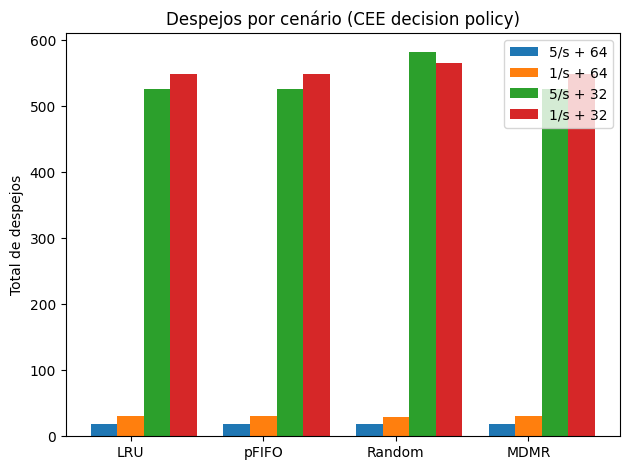

In [13]:
policies = ["LRU", "pFIFO","Random","MDMR"]
total_evictions = {
    "5/s + 64": (averaged_dict["C"]["evictions"], averaged_dict["G"]["evictions"], averaged_dict["K"]["evictions"], averaged_dict["ZA"]["evictions"]),
    "1/s + 64": (averaged_dict["A"]["evictions"], averaged_dict["E"]["evictions"], averaged_dict["I"]["evictions"], averaged_dict["Y"]["evictions"]),
    "5/s + 32": (averaged_dict["D"]["evictions"], averaged_dict["H"]["evictions"], averaged_dict["L"]["evictions"], averaged_dict["ZB"]["evictions"]),
    "1/s + 32": (averaged_dict["B"]["evictions"], averaged_dict["F"]["evictions"], averaged_dict["J"]["evictions"], averaged_dict["Z"]["evictions"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, total_evictions["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, total_evictions["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, total_evictions["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, total_evictions["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('Total de despejos')
ax.set_title('Despejos por cenário (CEE decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

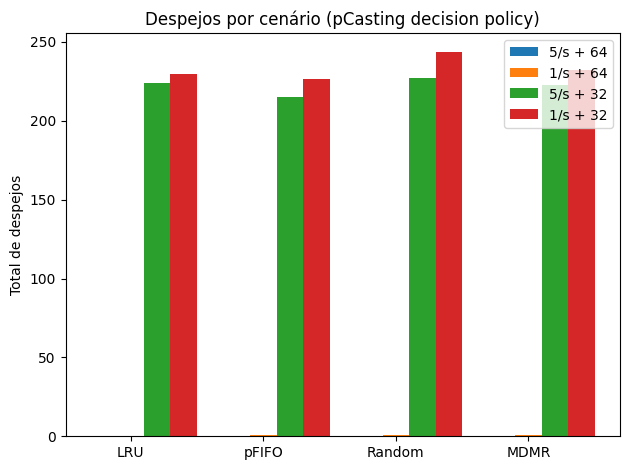

In [14]:
total_evictions = {
    "5/s + 64": (averaged_dict["O"]["evictions"], averaged_dict["S"]["evictions"], averaged_dict["W"]["evictions"], averaged_dict["ZE"]["evictions"]),
    "1/s + 64": (averaged_dict["M"]["evictions"], averaged_dict["Q"]["evictions"], averaged_dict["U"]["evictions"], averaged_dict["ZC"]["evictions"]),
    "5/s + 32": (averaged_dict["P"]["evictions"], averaged_dict["T"]["evictions"], averaged_dict["X"]["evictions"], averaged_dict["ZF"]["evictions"]),
    "1/s + 32": (averaged_dict["N"]["evictions"], averaged_dict["R"]["evictions"], averaged_dict["V"]["evictions"], averaged_dict["ZD"]["evictions"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, total_evictions["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, total_evictions["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, total_evictions["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, total_evictions["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('Total de despejos')
ax.set_title('Despejos por cenário (pCasting decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

## Hit ratio

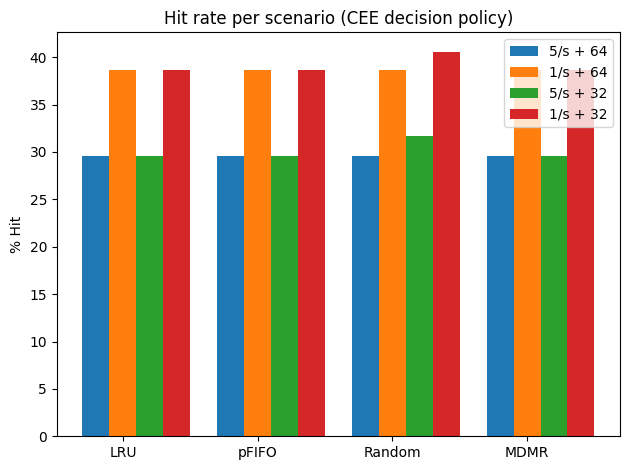

In [15]:
hit_rate = {
    "5/s + 64": (averaged_dict["C"]["hitratio"], averaged_dict["G"]["hitratio"], averaged_dict["K"]["hitratio"], averaged_dict["ZA"]["hitratio"]),
    "1/s + 64": (averaged_dict["A"]["hitratio"], averaged_dict["E"]["hitratio"], averaged_dict["I"]["hitratio"], averaged_dict["Y"]["hitratio"]),
    "5/s + 32": (averaged_dict["D"]["hitratio"], averaged_dict["H"]["hitratio"], averaged_dict["L"]["hitratio"], averaged_dict["ZB"]["hitratio"]),
    "1/s + 32": (averaged_dict["B"]["hitratio"], averaged_dict["F"]["hitratio"], averaged_dict["J"]["hitratio"], averaged_dict["Z"]["hitratio"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, hit_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, hit_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, hit_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, hit_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('% Hit')
ax.set_title('Hit rate per scenario (CEE decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

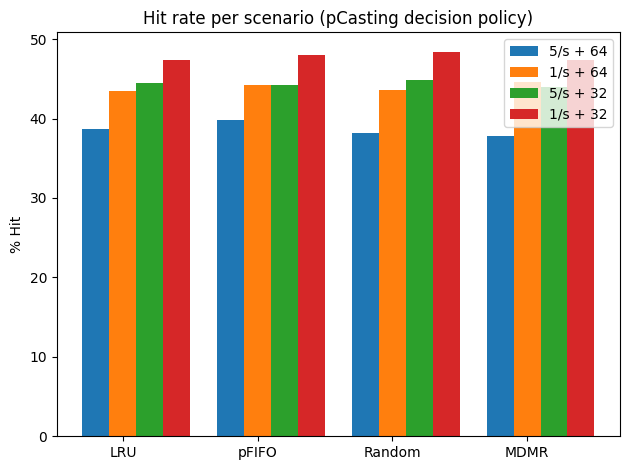

In [16]:
hit_rate = {
    "5/s + 64": (averaged_dict["O"]["hitratio"], averaged_dict["S"]["hitratio"], averaged_dict["W"]["hitratio"], averaged_dict["ZE"]["hitratio"]),
    "1/s + 64": (averaged_dict["M"]["hitratio"], averaged_dict["Q"]["hitratio"], averaged_dict["U"]["hitratio"], averaged_dict["ZC"]["hitratio"]),
    "5/s + 32": (averaged_dict["P"]["hitratio"], averaged_dict["T"]["hitratio"], averaged_dict["X"]["hitratio"], averaged_dict["ZF"]["hitratio"]),
    "1/s + 32": (averaged_dict["N"]["hitratio"], averaged_dict["R"]["hitratio"], averaged_dict["V"]["hitratio"], averaged_dict["ZD"]["hitratio"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, hit_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, hit_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, hit_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, hit_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('% Hit')
ax.set_title('Hit rate per scenario (pCasting decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

## Server load

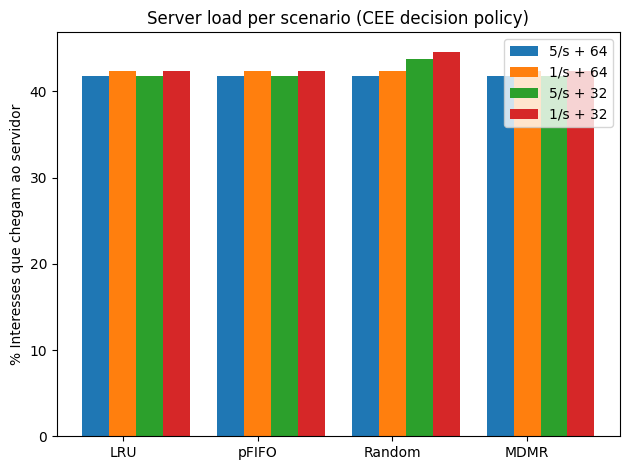

In [17]:
server_load_data = {
    "5/s + 64": (averaged_dict["C"]["serverload"], averaged_dict["G"]["serverload"], averaged_dict["K"]["serverload"], averaged_dict["ZA"]["serverload"]),
    "1/s + 64": (averaged_dict["A"]["serverload"], averaged_dict["E"]["serverload"], averaged_dict["I"]["serverload"], averaged_dict["Y"]["serverload"]),
    "5/s + 32": (averaged_dict["D"]["serverload"], averaged_dict["H"]["serverload"], averaged_dict["L"]["serverload"], averaged_dict["ZB"]["serverload"]),
    "1/s + 32": (averaged_dict["B"]["serverload"], averaged_dict["F"]["serverload"], averaged_dict["J"]["serverload"], averaged_dict["Z"]["serverload"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, server_load_data["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, server_load_data["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, server_load_data["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, server_load_data["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('% Interesses que chegam ao servidor')
ax.set_title('Server load per scenario (CEE decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

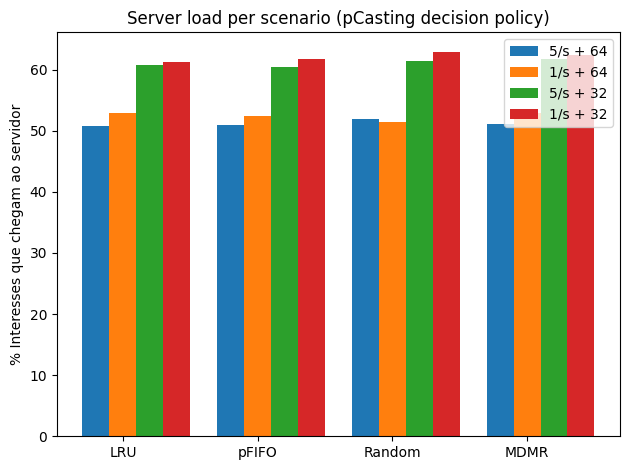

In [18]:
server_load_rate = {
    "5/s + 64": (averaged_dict["O"]["serverload"], averaged_dict["S"]["serverload"], averaged_dict["W"]["serverload"], averaged_dict["ZE"]["serverload"]),
    "1/s + 64": (averaged_dict["M"]["serverload"], averaged_dict["Q"]["serverload"], averaged_dict["U"]["serverload"], averaged_dict["ZC"]["serverload"]),
    "5/s + 32": (averaged_dict["P"]["serverload"], averaged_dict["T"]["serverload"], averaged_dict["X"]["serverload"], averaged_dict["ZF"]["serverload"]),
    "1/s + 32": (averaged_dict["N"]["serverload"], averaged_dict["R"]["serverload"], averaged_dict["V"]["serverload"], averaged_dict["ZD"]["serverload"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, server_load_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, server_load_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, server_load_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, server_load_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('% Interesses que chegam ao servidor')
ax.set_title('Server load per scenario (pCasting decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

## Retrieval delay

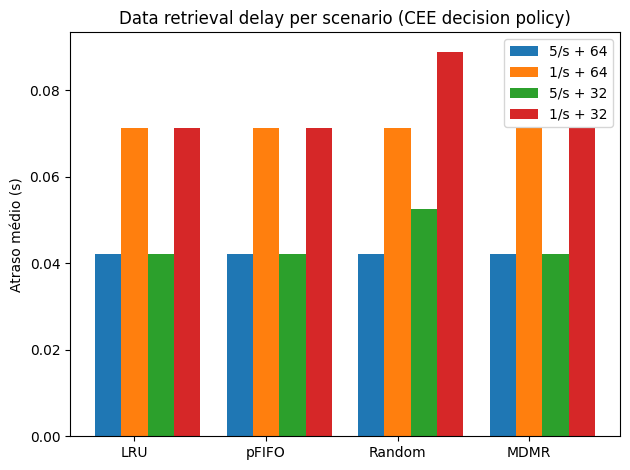

In [19]:
delay_rate = {
    "5/s + 64": (averaged_dict["C"]["retransmissiondelay"], averaged_dict["G"]["retransmissiondelay"], averaged_dict["K"]["retransmissiondelay"], averaged_dict["ZA"]["retransmissiondelay"]),
    "1/s + 64": (averaged_dict["A"]["retransmissiondelay"], averaged_dict["E"]["retransmissiondelay"], averaged_dict["I"]["retransmissiondelay"], averaged_dict["Y"]["retransmissiondelay"]),
    "5/s + 32": (averaged_dict["D"]["retransmissiondelay"], averaged_dict["H"]["retransmissiondelay"], averaged_dict["L"]["retransmissiondelay"], averaged_dict["ZB"]["retransmissiondelay"]),
    "1/s + 32": (averaged_dict["B"]["retransmissiondelay"], averaged_dict["F"]["retransmissiondelay"], averaged_dict["J"]["retransmissiondelay"], averaged_dict["Z"]["retransmissiondelay"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, delay_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, delay_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, delay_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, delay_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('Atraso médio (s)')
ax.set_title('Data retrieval delay per scenario (CEE decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

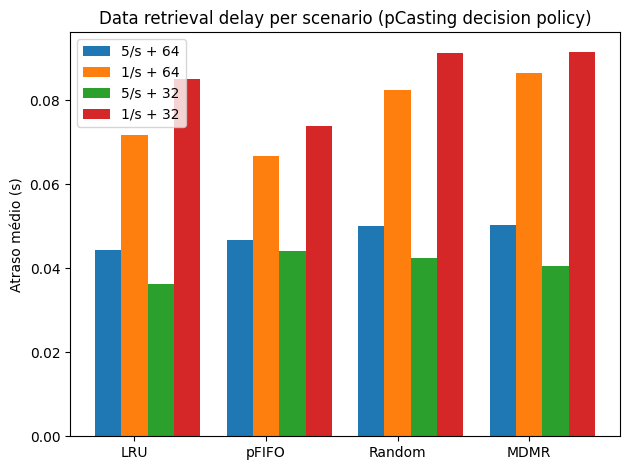

In [20]:
delay_rate = {
    "5/s + 64": (averaged_dict["O"]["retransmissiondelay"], averaged_dict["S"]["retransmissiondelay"], averaged_dict["W"]["retransmissiondelay"], averaged_dict["ZE"]["retransmissiondelay"]),
    "1/s + 64": (averaged_dict["M"]["retransmissiondelay"], averaged_dict["Q"]["retransmissiondelay"], averaged_dict["U"]["retransmissiondelay"], averaged_dict["ZC"]["retransmissiondelay"]),
    "5/s + 32": (averaged_dict["P"]["retransmissiondelay"], averaged_dict["T"]["retransmissiondelay"], averaged_dict["X"]["retransmissiondelay"], averaged_dict["ZF"]["retransmissiondelay"]),
    "1/s + 32": (averaged_dict["N"]["retransmissiondelay"], averaged_dict["R"]["retransmissiondelay"], averaged_dict["V"]["retransmissiondelay"], averaged_dict["ZD"]["retransmissiondelay"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, delay_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, delay_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, delay_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, delay_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('Atraso médio (s)')
ax.set_title('Data retrieval delay per scenario (pCasting decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

## Retransmission rate

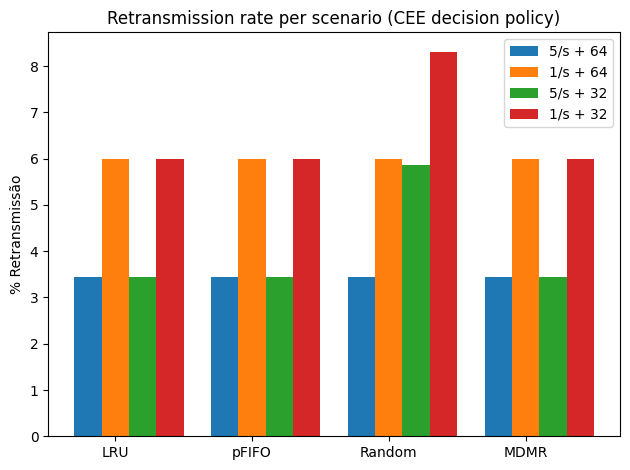

In [21]:
retransmission_rate = {
    "5/s + 64": (averaged_dict["C"]["resendratio"], averaged_dict["G"]["resendratio"], averaged_dict["K"]["resendratio"], averaged_dict["ZA"]["resendratio"]),
    "1/s + 64": (averaged_dict["A"]["resendratio"], averaged_dict["E"]["resendratio"], averaged_dict["I"]["resendratio"], averaged_dict["Y"]["resendratio"]),
    "5/s + 32": (averaged_dict["D"]["resendratio"], averaged_dict["H"]["resendratio"], averaged_dict["L"]["resendratio"], averaged_dict["ZB"]["resendratio"]),
    "1/s + 32": (averaged_dict["B"]["resendratio"], averaged_dict["F"]["resendratio"], averaged_dict["J"]["resendratio"], averaged_dict["Z"]["resendratio"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, retransmission_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, retransmission_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, retransmission_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, retransmission_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('% Retransmissão')
ax.set_title('Retransmission rate per scenario (CEE decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

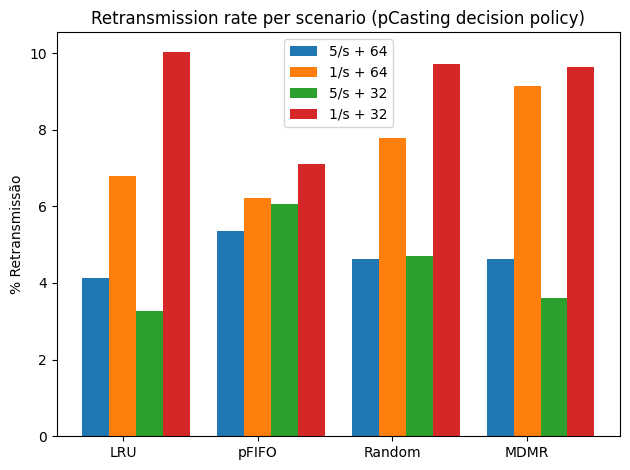

In [22]:
retransmission_rate = {
    "5/s + 64": (averaged_dict["O"]["resendratio"], averaged_dict["S"]["resendratio"], averaged_dict["W"]["resendratio"], averaged_dict["ZE"]["resendratio"]),
    "1/s + 64": (averaged_dict["M"]["resendratio"], averaged_dict["Q"]["resendratio"], averaged_dict["U"]["resendratio"], averaged_dict["ZC"]["resendratio"]),
    "5/s + 32": (averaged_dict["P"]["resendratio"], averaged_dict["T"]["resendratio"], averaged_dict["X"]["resendratio"], averaged_dict["ZF"]["resendratio"]),
    "1/s + 32": (averaged_dict["N"]["resendratio"], averaged_dict["R"]["resendratio"], averaged_dict["V"]["resendratio"], averaged_dict["ZD"]["resendratio"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, retransmission_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, retransmission_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, retransmission_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, retransmission_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('% Retransmissão')
ax.set_title('Retransmission rate per scenario (pCasting decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

## Errors

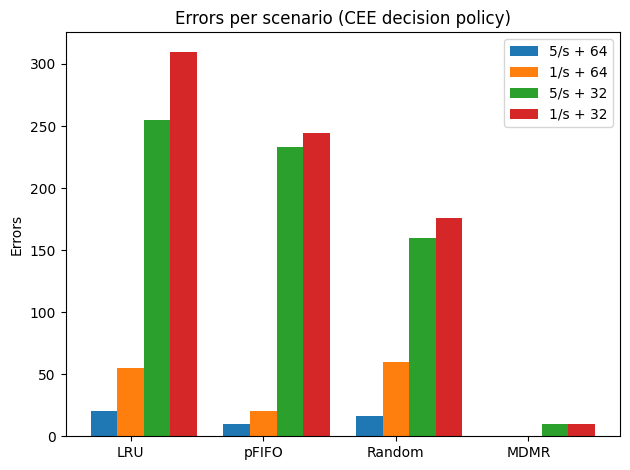

In [23]:
errors_rate = {
    "5/s + 64": (summed_dict["C"]["errors"], summed_dict["G"]["errors"], summed_dict["K"]["errors"], summed_dict["ZA"]["errors"]),
    "1/s + 64": (summed_dict["A"]["errors"], summed_dict["E"]["errors"], summed_dict["I"]["errors"], summed_dict["Y"]["errors"]),
    "5/s + 32": (summed_dict["D"]["errors"], summed_dict["H"]["errors"], summed_dict["L"]["errors"], summed_dict["ZB"]["errors"]),
    "1/s + 32": (summed_dict["B"]["errors"], summed_dict["F"]["errors"], summed_dict["J"]["errors"], summed_dict["Z"]["errors"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, errors_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, errors_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, errors_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, errors_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('Errors')
ax.set_title('Errors per scenario (CEE decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

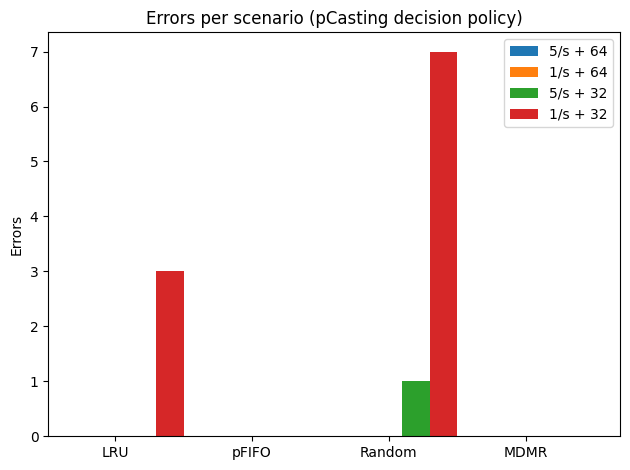

In [24]:
errors_rate = {
    "5/s + 64": (summed_dict["O"]["errors"], summed_dict["S"]["errors"], summed_dict["W"]["errors"], summed_dict["ZE"]["errors"]),
    "1/s + 64": (summed_dict["M"]["errors"], summed_dict["Q"]["errors"], summed_dict["U"]["errors"], summed_dict["ZC"]["errors"]),
    "5/s + 32": (summed_dict["P"]["errors"], summed_dict["T"]["errors"], summed_dict["X"]["errors"], summed_dict["ZF"]["errors"]),
    "1/s + 32": (summed_dict["N"]["errors"], summed_dict["R"]["errors"], summed_dict["V"]["errors"], summed_dict["ZD"]["errors"])
}

x = np.arange(len(policies))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, errors_rate["5/s + 64"], width, label='5/s + 64')
rects2 = ax.bar(x, errors_rate["1/s + 64"], width, label='1/s + 64')
rects3 = ax.bar(x + width, errors_rate["5/s + 32"], width, label='5/s + 32')
rects4 = ax.bar(x + 2 * width, errors_rate["1/s + 32"], width, label='1/s + 32')

ax.set_ylabel('Errors')
ax.set_title('Errors per scenario (pCasting decision policy)')
ax.set_xticks(x)
ax.set_xticklabels(policies)
ax.legend()

fig.tight_layout()

plt.show()

# Per Scenario

## T = 5 | CS = 64

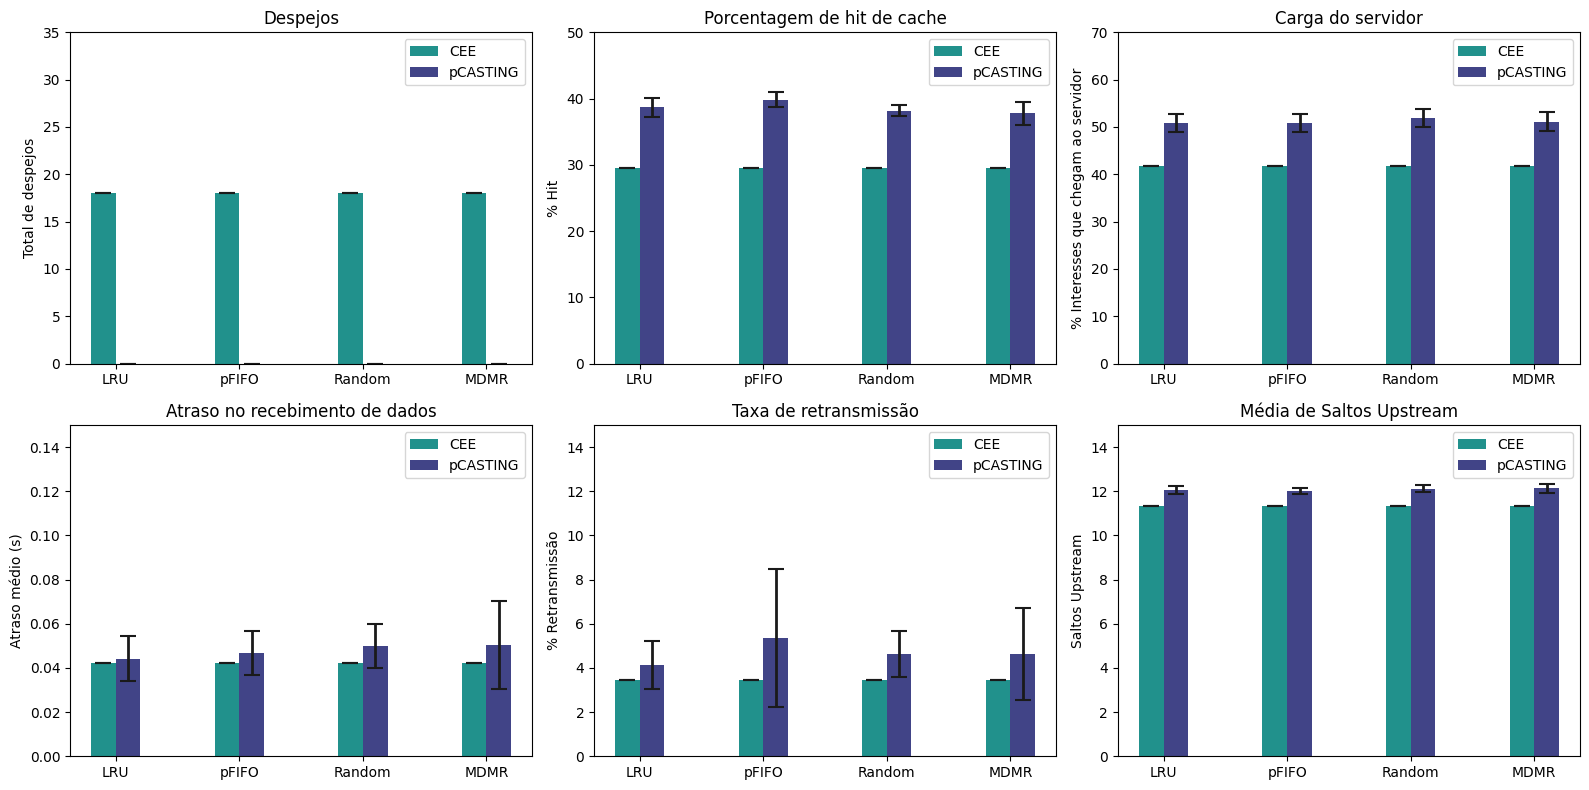

In [25]:
total_evictions1 = {
    "CEE": (averaged_dict["C"]["evictions"], averaged_dict["G"]["evictions"], averaged_dict["K"]["evictions"], averaged_dict["ZA"]["evictions"]),
    "pCASTING": (averaged_dict["O"]["evictions"], averaged_dict["S"]["evictions"], averaged_dict["W"]["evictions"], averaged_dict["ZE"]["evictions"])
}

hit_rate1 = {
    "CEE": (averaged_dict["C"]["hitratio"], averaged_dict["G"]["hitratio"], averaged_dict["K"]["hitratio"], averaged_dict["ZA"]["hitratio"]),
    "pCASTING": (averaged_dict["O"]["hitratio"], averaged_dict["S"]["hitratio"], averaged_dict["W"]["hitratio"], averaged_dict["ZE"]["hitratio"])
}

server_load_data1 = {
    "CEE": (averaged_dict["C"]["serverload"], averaged_dict["G"]["serverload"], averaged_dict["K"]["serverload"], averaged_dict["ZA"]["serverload"]),
    "pCASTING": (averaged_dict["O"]["serverload"], averaged_dict["S"]["serverload"], averaged_dict["W"]["serverload"], averaged_dict["ZE"]["serverload"])
}

delay_rate1 = {
    "CEE": (averaged_dict["C"]["retransmissiondelay"], averaged_dict["G"]["retransmissiondelay"], averaged_dict["K"]["retransmissiondelay"], averaged_dict["ZA"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["O"]["retransmissiondelay"], averaged_dict["S"]["retransmissiondelay"], averaged_dict["W"]["retransmissiondelay"], averaged_dict["ZE"]["retransmissiondelay"])
}

retransmission_rate1 = {
    "CEE": (averaged_dict["C"]["resendratio"], averaged_dict["G"]["resendratio"], averaged_dict["K"]["resendratio"], averaged_dict["ZA"]["resendratio"]),
    "pCASTING": (averaged_dict["O"]["resendratio"], averaged_dict["S"]["resendratio"], averaged_dict["W"]["resendratio"], averaged_dict["ZE"]["resendratio"])
}

hops_up1 = {
    "CEE": (averaged_dict["C"]["hops_upstream"], averaged_dict["G"]["hops_upstream"], averaged_dict["K"]["hops_upstream"], averaged_dict["ZA"]["hops_upstream"]),
    "pCASTING": (averaged_dict["O"]["hops_upstream"], averaged_dict["S"]["hops_upstream"], averaged_dict["W"]["hops_upstream"], averaged_dict["ZE"]["hops_upstream"])
}

x = np.arange(len(policies))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

error_config = {'ecolor': '0.1', 'capsize': 6, 'capthick': 1.5, 'elinewidth': 2}

# Gráfico 1

rects1 = ax1.bar(x - width / 2, total_evictions1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['evictions'], error_kw=error_config)

ax1.set_ylim(0,35)
ax1.set_ylabel('Total de despejos')
ax1.set_title('Despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

# Gráfico 2
rects1 = ax2.bar(x - width / 2, hit_rate1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit')
ax2.set_title('Porcentagem de hit de cache')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

# Gráfico 3
rects1 = ax3.bar(x - width / 2, server_load_data1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_title('Carga do servidor')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

# Gráfico 4
rects1 = ax4.bar(x - width / 2, delay_rate1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['retransmissiondelay'], error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['retransmissiondelay'], error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Atraso médio (s)')
ax4.set_title('Atraso no recebimento de dados')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

# Gráfico 5
rects1 = ax5.bar(x - width / 2, retransmission_rate1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_title('Taxa de retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

# Gráfico 6
rects1 = ax6.bar(x - width / 2, hops_up1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_up1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos Upstream')
ax6.set_title('Média de Saltos Upstream')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

# Configura um título geral

fig.tight_layout()

plt.show()

## T = 1 | CS = 64

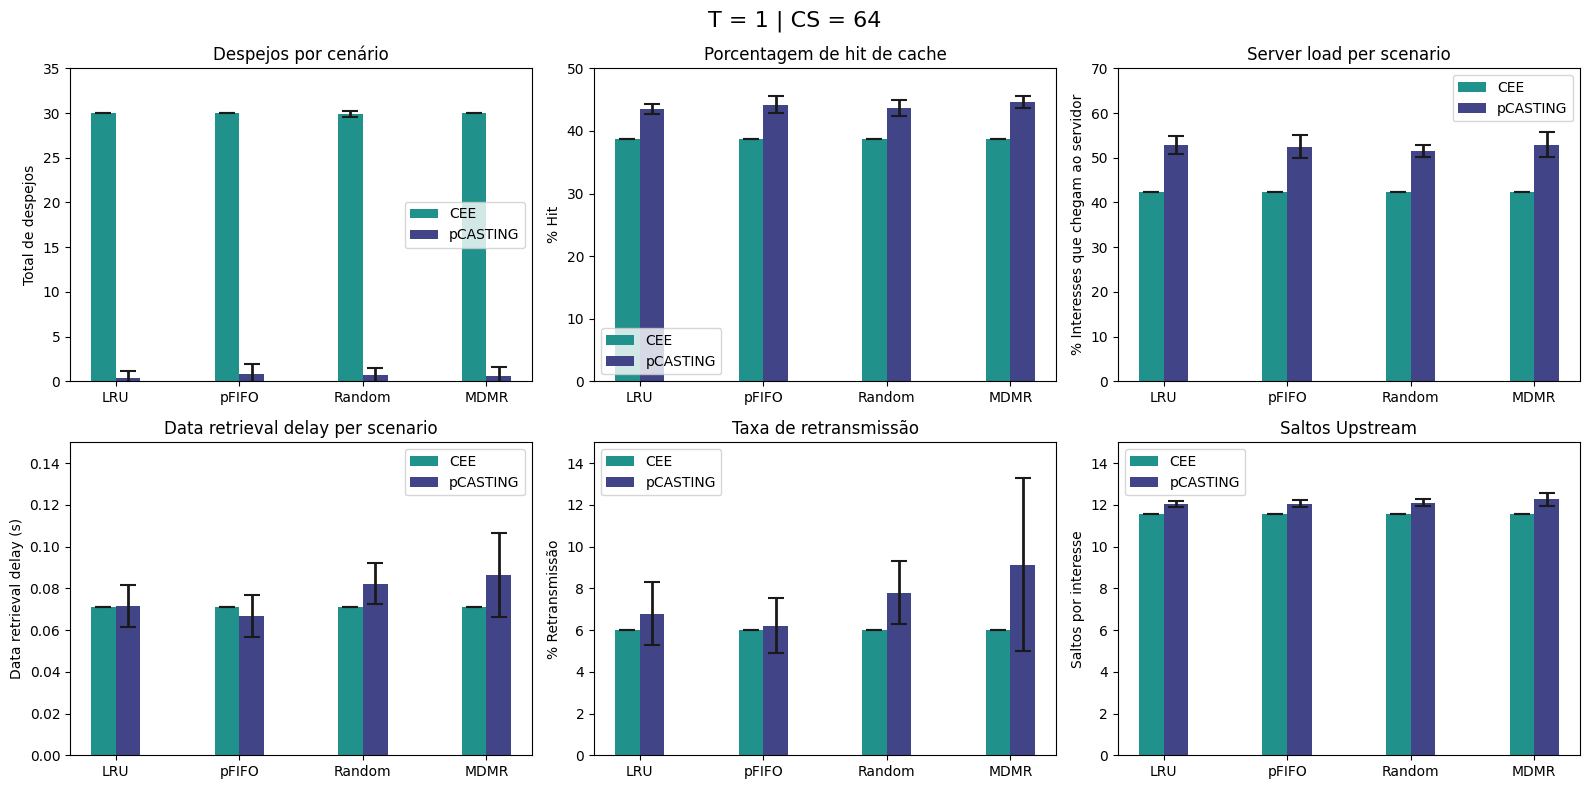

In [26]:
total_evictions2 = {
    "CEE": (averaged_dict["A"]["evictions"], averaged_dict["E"]["evictions"], averaged_dict["I"]["evictions"], averaged_dict["Y"]["evictions"]),
    "pCASTING": (averaged_dict["M"]["evictions"], averaged_dict["Q"]["evictions"], averaged_dict["U"]["evictions"], averaged_dict["ZC"]["evictions"])
}

hit_rate2 = {
    "CEE": (averaged_dict["A"]["hitratio"], averaged_dict["E"]["hitratio"], averaged_dict["I"]["hitratio"], averaged_dict["Y"]["hitratio"]),
    "pCASTING": (averaged_dict["M"]["hitratio"], averaged_dict["Q"]["hitratio"], averaged_dict["U"]["hitratio"], averaged_dict["ZC"]["hitratio"])
}

server_load_data2 = {
    "CEE": (averaged_dict["A"]["serverload"], averaged_dict["E"]["serverload"], averaged_dict["I"]["serverload"], averaged_dict["Y"]["serverload"]),
    "pCASTING": (averaged_dict["M"]["serverload"], averaged_dict["Q"]["serverload"], averaged_dict["U"]["serverload"], averaged_dict["ZC"]["serverload"])
}

delay_rate2 = {
    "CEE": (averaged_dict["A"]["retransmissiondelay"], averaged_dict["E"]["retransmissiondelay"], averaged_dict["I"]["retransmissiondelay"], averaged_dict["Y"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["M"]["retransmissiondelay"], averaged_dict["Q"]["retransmissiondelay"], averaged_dict["U"]["retransmissiondelay"], averaged_dict["ZC"]["retransmissiondelay"])
}

retransmission_rate2 = {
    "CEE": (averaged_dict["A"]["resendratio"], averaged_dict["E"]["resendratio"], averaged_dict["I"]["resendratio"], averaged_dict["Y"]["resendratio"]),
    "pCASTING": (averaged_dict["M"]["resendratio"], averaged_dict["Q"]["resendratio"], averaged_dict["U"]["resendratio"], averaged_dict["ZC"]["resendratio"])
}

hops_upstream_rate2 = {
    "CEE": (averaged_dict["A"]["hops_upstream"], averaged_dict["E"]["hops_upstream"], averaged_dict["I"]["hops_upstream"], averaged_dict["Y"]["hops_upstream"]),
    "pCASTING": (averaged_dict["M"]["hops_upstream"], averaged_dict["Q"]["hops_upstream"], averaged_dict["U"]["hops_upstream"], averaged_dict["ZC"]["hops_upstream"])
}

x = np.arange(len(policies))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

# Gráfico 1

rects1 = ax1.bar(x - width / 2, total_evictions2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['evictions'], error_kw=error_config)

ax1.set_ylim(0,35)
ax1.set_ylabel('Total de despejos')
ax1.set_title('Despejos por cenário')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

# Gráfico 2
rects1 = ax2.bar(x - width / 2, hit_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit')
ax2.set_title('Porcentagem de hit de cache')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

# Gráfico 3
rects1 = ax3.bar(x - width / 2, server_load_data2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_title('Server load per scenario')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

# Gráfico 4
rects1 = ax4.bar(x - width / 2, delay_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['retransmissiondelay'], error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['retransmissiondelay'], error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Data retrieval delay (s)')
ax4.set_title('Data retrieval delay per scenario')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

# Gráfico 5
rects1 = ax5.bar(x - width / 2, retransmission_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_title('Taxa de retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

# Gráfico 6
rects1 = ax6.bar(x - width / 2, hops_upstream_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_upstream_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos por interesse')
ax6.set_title('Saltos Upstream')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

# Configura um título geral
fig.suptitle('T = 1 | CS = 64', fontsize=16)

fig.tight_layout()

plt.show()

## T = 5 | CS = 32

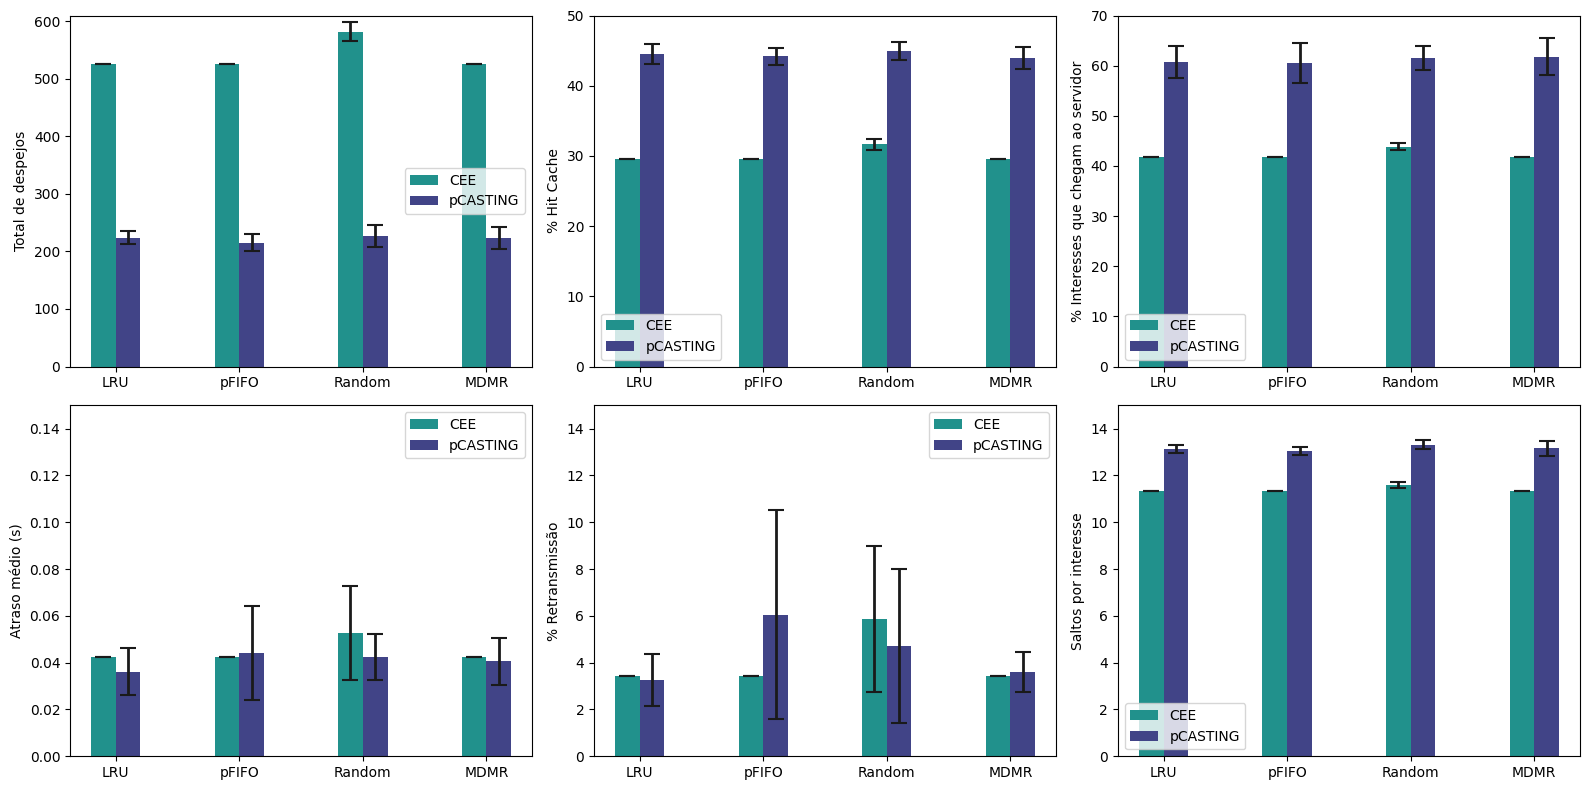

In [27]:
total_evictions3 = {
    "CEE": (averaged_dict["D"]["evictions"], averaged_dict["H"]["evictions"], averaged_dict["L"]["evictions"], averaged_dict["ZB"]["evictions"]),
    "pCASTING": (averaged_dict["P"]["evictions"], averaged_dict["T"]["evictions"], averaged_dict["X"]["evictions"], averaged_dict["ZF"]["evictions"])
}

hit_rate3 = {
    "CEE": (averaged_dict["D"]["hitratio"], averaged_dict["H"]["hitratio"], averaged_dict["L"]["hitratio"], averaged_dict["ZB"]["hitratio"]),
    "pCASTING": (averaged_dict["P"]["hitratio"], averaged_dict["T"]["hitratio"], averaged_dict["X"]["hitratio"], averaged_dict["ZF"]["hitratio"])
}

server_load_data3 = {
    "CEE": (averaged_dict["D"]["serverload"], averaged_dict["H"]["serverload"], averaged_dict["L"]["serverload"], averaged_dict["ZB"]["serverload"]),
    "pCASTING": (averaged_dict["P"]["serverload"], averaged_dict["T"]["serverload"], averaged_dict["X"]["serverload"], averaged_dict["ZF"]["serverload"])
}

delay_rate3 = {
    "CEE": (averaged_dict["D"]["retransmissiondelay"], averaged_dict["H"]["retransmissiondelay"], averaged_dict["L"]["retransmissiondelay"], averaged_dict["ZB"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["P"]["retransmissiondelay"], averaged_dict["T"]["retransmissiondelay"], averaged_dict["X"]["retransmissiondelay"], averaged_dict["ZF"]["retransmissiondelay"])
}

retransmission_rate3 = {
    "CEE": (averaged_dict["D"]["resendratio"], averaged_dict["H"]["resendratio"], averaged_dict["L"]["resendratio"], averaged_dict["ZB"]["resendratio"]),
    "pCASTING": (averaged_dict["P"]["resendratio"], averaged_dict["T"]["resendratio"], averaged_dict["X"]["resendratio"], averaged_dict["ZF"]["resendratio"])
}

hops_upstream_rate3 = {
    "CEE": (averaged_dict["D"]["hops_upstream"], averaged_dict["H"]["hops_upstream"], averaged_dict["L"]["hops_upstream"], averaged_dict["ZB"]["hops_upstream"]),
    "pCASTING": (averaged_dict["P"]["hops_upstream"], averaged_dict["T"]["hops_upstream"], averaged_dict["X"]["hops_upstream"], averaged_dict["ZF"]["hops_upstream"])
}

x = np.arange(len(policies))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

# Gráfico 1

rects1 = ax1.bar(x - width / 2, total_evictions3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['evictions'], error_kw=error_config)

ax1.set_ylim(0,610)
ax1.set_ylabel('Total de despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

# Gráfico 2
rects1 = ax2.bar(x - width / 2, hit_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit Cache')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

# Gráfico 3
rects1 = ax3.bar(x - width / 2, server_load_data3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

# Gráfico 4
rects1 = ax4.bar(x - width / 2, delay_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['retransmissiondelay'], error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['retransmissiondelay'], error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Atraso médio (s)')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

# Gráfico 5
rects1 = ax5.bar(x - width / 2, retransmission_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

# Gráfico 6
rects1 = ax6.bar(x - width / 2, hops_upstream_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_upstream_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos por interesse')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

# Configura um título geral

fig.tight_layout()

plt.show()

## T = 1 | CS = 32

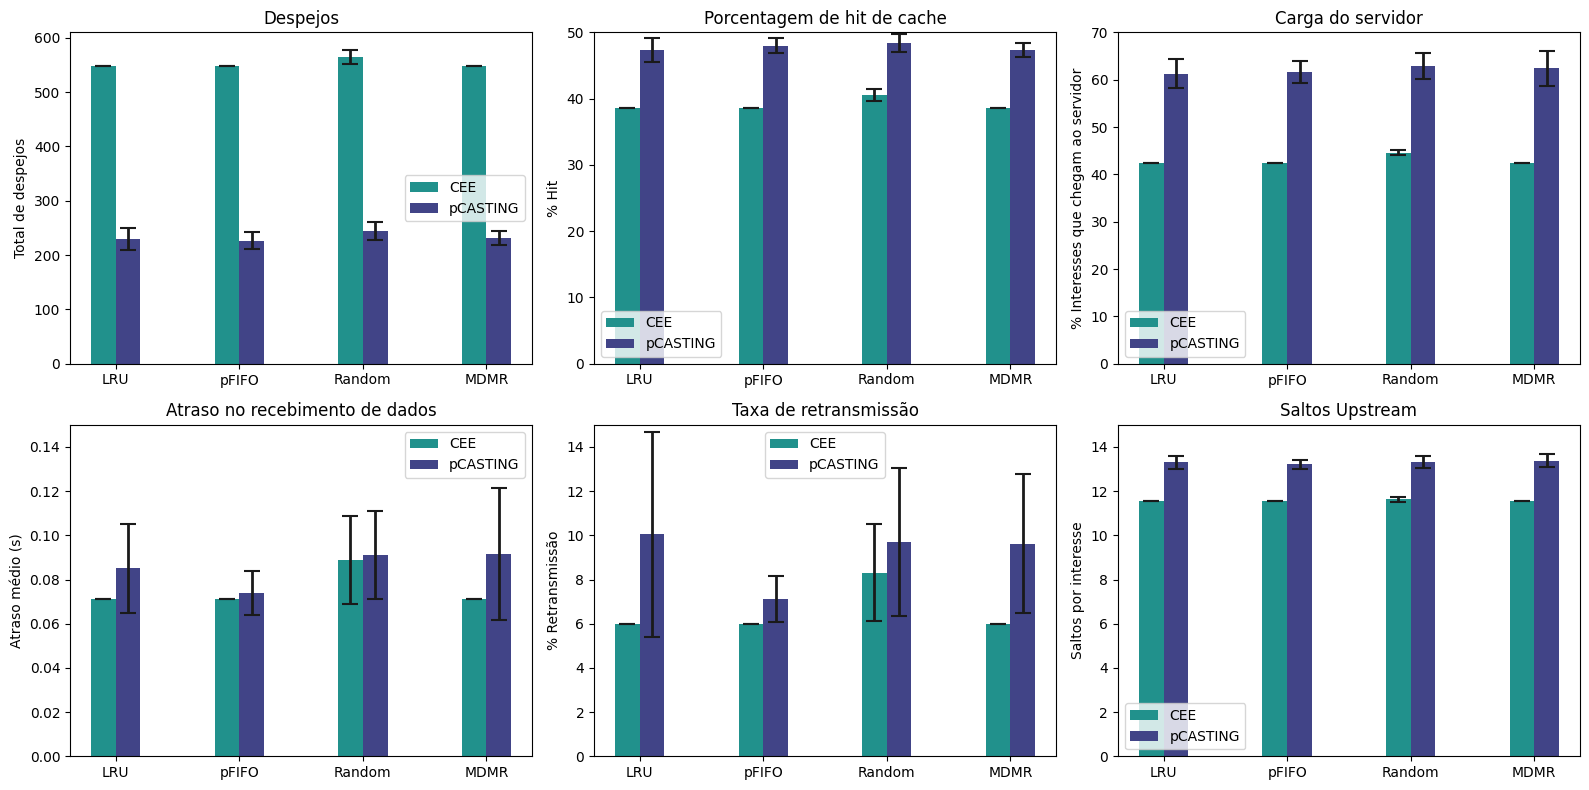

In [28]:
total_evictions4 = {
    "CEE": (averaged_dict["B"]["evictions"], averaged_dict["F"]["evictions"], averaged_dict["J"]["evictions"], averaged_dict["Z"]["evictions"]),
    "pCASTING": (averaged_dict["N"]["evictions"], averaged_dict["R"]["evictions"], averaged_dict["V"]["evictions"], averaged_dict["ZD"]["evictions"])
}

hit_rate4 = {
    "CEE": (averaged_dict["B"]["hitratio"], averaged_dict["F"]["hitratio"], averaged_dict["J"]["hitratio"], averaged_dict["Z"]["hitratio"]),
    "pCASTING": (averaged_dict["N"]["hitratio"], averaged_dict["R"]["hitratio"], averaged_dict["V"]["hitratio"], averaged_dict["ZD"]["hitratio"])
}

server_load_data4 = {
    "CEE": (averaged_dict["B"]["serverload"], averaged_dict["F"]["serverload"], averaged_dict["J"]["serverload"], averaged_dict["Z"]["serverload"]),
    "pCASTING": (averaged_dict["N"]["serverload"], averaged_dict["R"]["serverload"], averaged_dict["V"]["serverload"], averaged_dict["ZD"]["serverload"])
}

delay_rate4 = {
    "CEE": (averaged_dict["B"]["retransmissiondelay"], averaged_dict["F"]["retransmissiondelay"], averaged_dict["J"]["retransmissiondelay"], averaged_dict["Z"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["N"]["retransmissiondelay"], averaged_dict["R"]["retransmissiondelay"], averaged_dict["V"]["retransmissiondelay"], averaged_dict["ZD"]["retransmissiondelay"])
}

retransmission_rate4 = {
    "CEE": (averaged_dict["B"]["resendratio"], averaged_dict["F"]["resendratio"], averaged_dict["J"]["resendratio"], averaged_dict["Z"]["resendratio"]),
    "pCASTING": (averaged_dict["N"]["resendratio"], averaged_dict["R"]["resendratio"], averaged_dict["V"]["resendratio"], averaged_dict["ZD"]["resendratio"])
}

hops_upstream_rate4 = {
    "CEE": (averaged_dict["B"]["hops_upstream"], averaged_dict["F"]["hops_upstream"], averaged_dict["J"]["hops_upstream"], averaged_dict["Z"]["hops_upstream"]),
    "pCASTING": (averaged_dict["N"]["hops_upstream"], averaged_dict["R"]["hops_upstream"], averaged_dict["V"]["hops_upstream"], averaged_dict["ZD"]["hops_upstream"])
}

x = np.arange(len(policies))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

# Gráfico 1
rects1 = ax1.bar(x - width / 2, total_evictions4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['evictions'], error_kw=error_config)

ax1.set_ylim(0,610)
ax1.set_ylabel('Total de despejos')
ax1.set_title('Despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

# Gráfico 2
rects1 = ax2.bar(x - width / 2, hit_rate4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit')
ax2.set_title('Porcentagem de hit de cache')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

# Gráfico 3
rects1 = ax3.bar(x - width / 2, server_load_data4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_title('Carga do servidor')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

# Gráfico 4
rects1 = ax4.bar(x - width / 2, delay_rate4["CEE"], width, yerr=g_devp['S7']['retransmissiondelay'], label='CEE', color=plt.cm.viridis(0.5), error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate4["pCASTING"], width, yerr=g_devp['S8']['retransmissiondelay'], label='pCASTING', color=plt.cm.viridis(0.2), error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Atraso médio (s)')
ax4.set_title('Atraso no recebimento de dados')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

# Gráfico 5
rects1 = ax5.bar(x - width / 2, retransmission_rate4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_title('Taxa de retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

# Gráfico 6
rects1 = ax6.bar(x - width / 2, hops_upstream_rate4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_upstream_rate4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos por interesse')
ax6.set_title('Saltos Upstream')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

# Configura um título geral

fig.tight_layout()

plt.show()

# Individual Export

## Scenes A

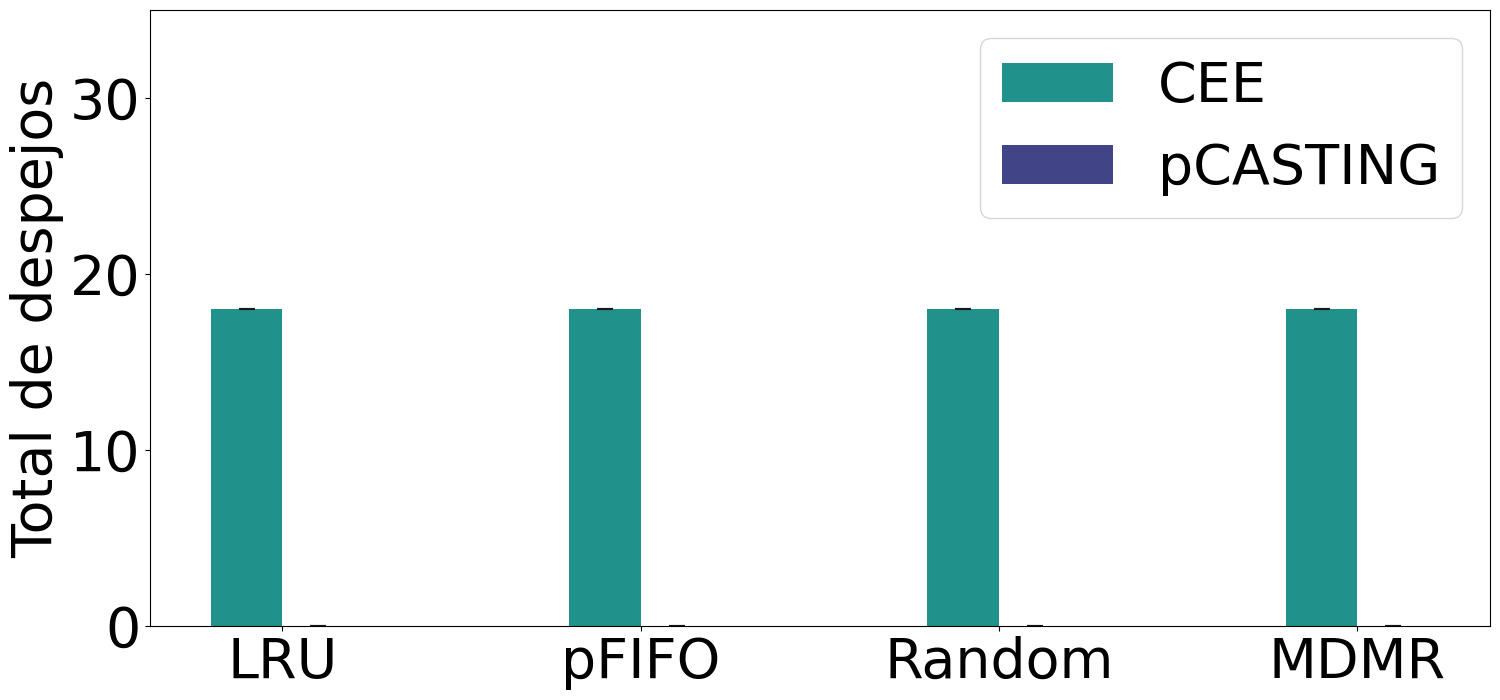

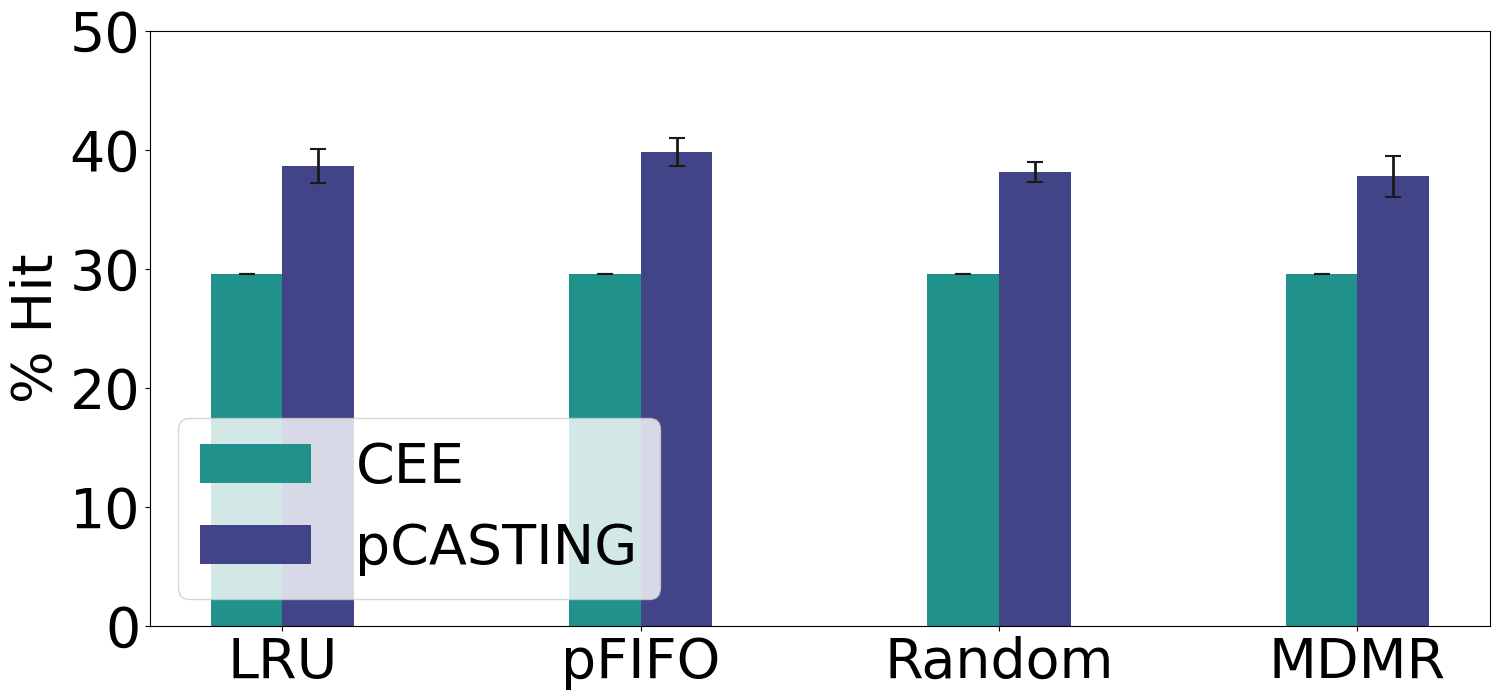

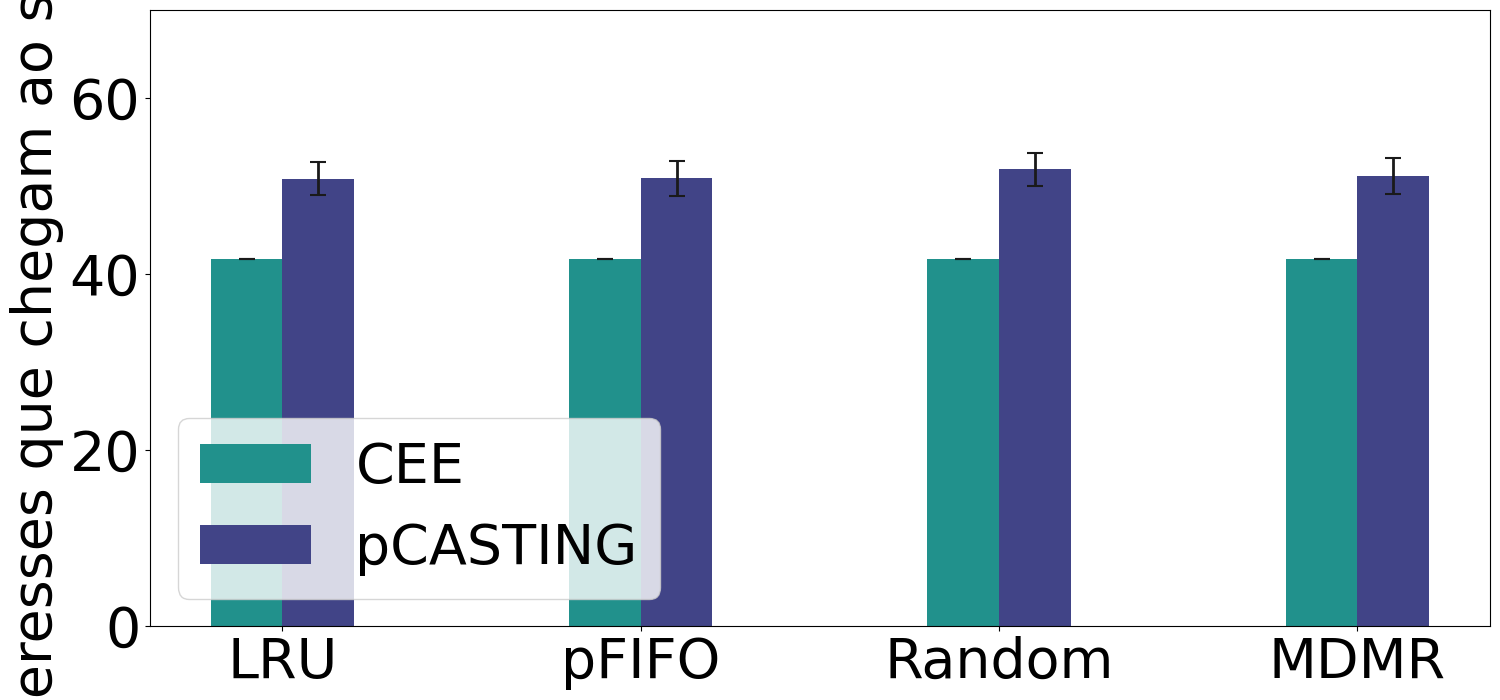

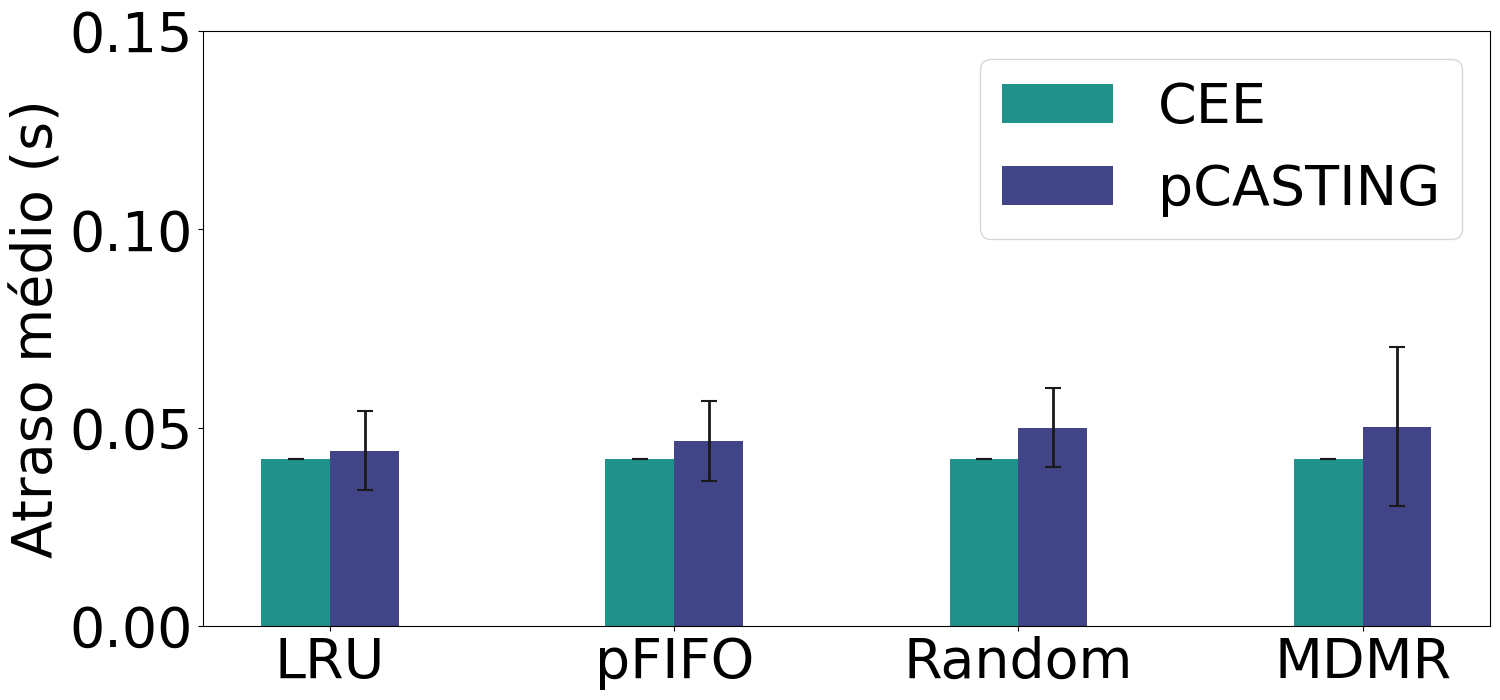

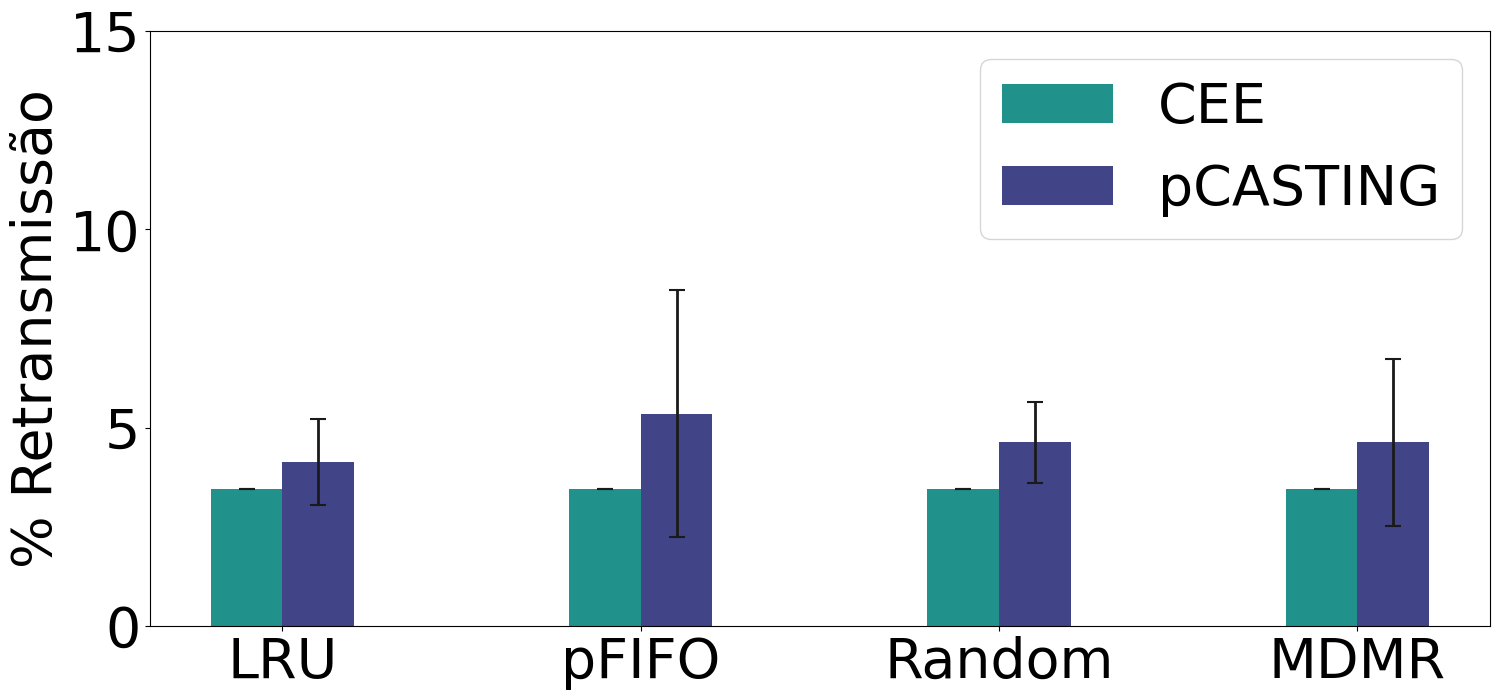

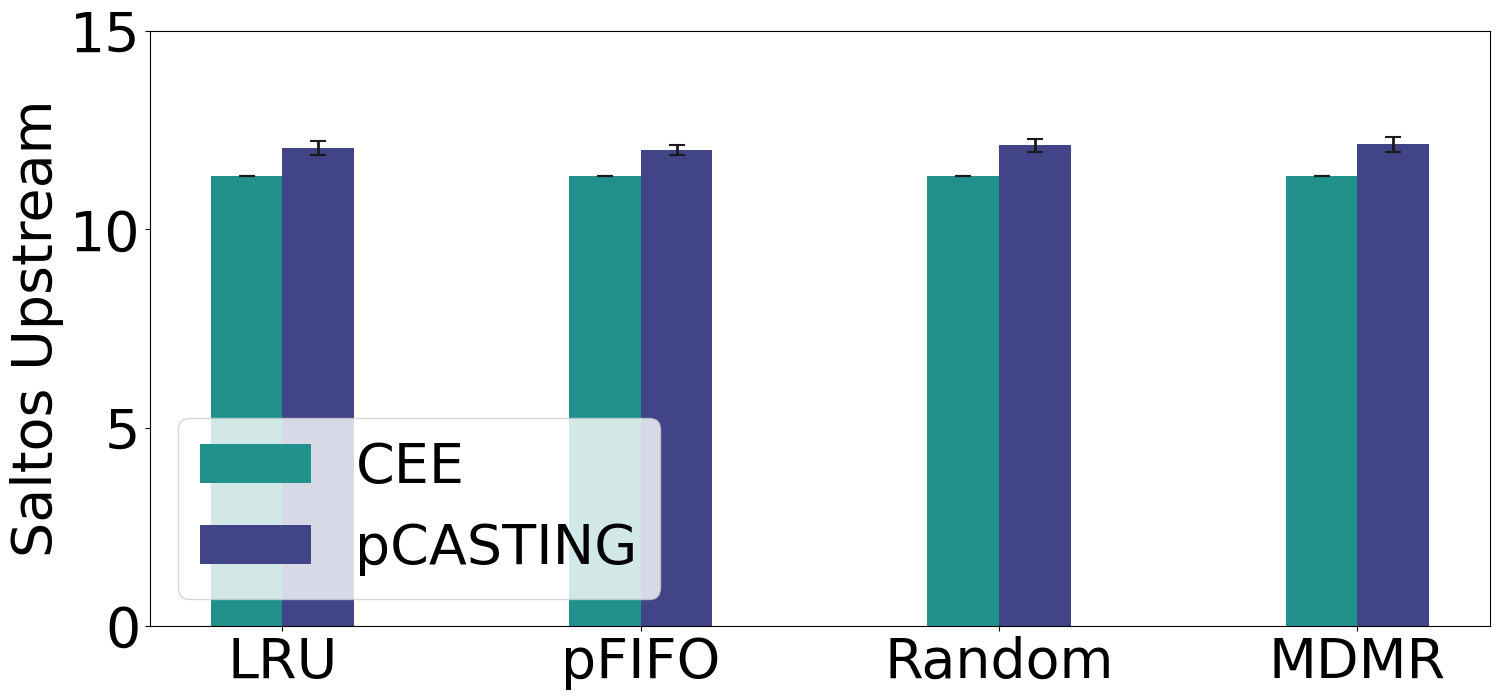

In [29]:
total_evictions1 = {
    "CEE": (averaged_dict["C"]["evictions"], averaged_dict["G"]["evictions"], averaged_dict["K"]["evictions"], averaged_dict["ZA"]["evictions"]),
    "pCASTING": (averaged_dict["O"]["evictions"], averaged_dict["S"]["evictions"], averaged_dict["W"]["evictions"], averaged_dict["ZE"]["evictions"])
}

hit_rate1 = {
    "CEE": (averaged_dict["C"]["hitratio"], averaged_dict["G"]["hitratio"], averaged_dict["K"]["hitratio"], averaged_dict["ZA"]["hitratio"]),
    "pCASTING": (averaged_dict["O"]["hitratio"], averaged_dict["S"]["hitratio"], averaged_dict["W"]["hitratio"], averaged_dict["ZE"]["hitratio"])
}

server_load_data1 = {
    "CEE": (averaged_dict["C"]["serverload"], averaged_dict["G"]["serverload"], averaged_dict["K"]["serverload"], averaged_dict["ZA"]["serverload"]),
    "pCASTING": (averaged_dict["O"]["serverload"], averaged_dict["S"]["serverload"], averaged_dict["W"]["serverload"], averaged_dict["ZE"]["serverload"])
}

delay_rate1 = {
    "CEE": (averaged_dict["C"]["retransmissiondelay"], averaged_dict["G"]["retransmissiondelay"], averaged_dict["K"]["retransmissiondelay"], averaged_dict["ZA"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["O"]["retransmissiondelay"], averaged_dict["S"]["retransmissiondelay"], averaged_dict["W"]["retransmissiondelay"], averaged_dict["ZE"]["retransmissiondelay"])
}

retransmission_rate1 = {
    "CEE": (averaged_dict["C"]["resendratio"], averaged_dict["G"]["resendratio"], averaged_dict["K"]["resendratio"], averaged_dict["ZA"]["resendratio"]),
    "pCASTING": (averaged_dict["O"]["resendratio"], averaged_dict["S"]["resendratio"], averaged_dict["W"]["resendratio"], averaged_dict["ZE"]["resendratio"])
}

hops_up1 = {
    "CEE": (averaged_dict["C"]["hops_upstream"], averaged_dict["G"]["hops_upstream"], averaged_dict["K"]["hops_upstream"], averaged_dict["ZA"]["hops_upstream"]),
    "pCASTING": (averaged_dict["O"]["hops_upstream"], averaged_dict["S"]["hops_upstream"], averaged_dict["W"]["hops_upstream"], averaged_dict["ZE"]["hops_upstream"])
}

x = np.arange(len(policies))

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

error_config = {'ecolor': '0.1', 'capsize': 6, 'capthick': 1.5, 'elinewidth': 2}

plt.rcParams.update({'font.size': 40})

# Gráfico 1
fig1, ax1 = plt.subplots(figsize=(16, 8))
rects1 = ax1.bar(x - width / 2, total_evictions1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['evictions'], error_kw=error_config)

ax1.set_ylim(0,35)
ax1.set_ylabel('Total de despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

fig1.tight_layout()
fig1.savefig('A_Despejos.png')

# Gráfico 2
fig2, ax2 = plt.subplots(figsize=(16, 8))
rects1 = ax2.bar(x - width / 2, hit_rate1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

fig2.tight_layout()
fig2.savefig('A_Hit.png')

# Gráfico 3
fig3, ax3 = plt.subplots(figsize=(16, 8))
rects1 = ax3.bar(x - width / 2, server_load_data1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

fig3.tight_layout()
fig3.savefig('A_Carga.png')

# Gráfico 4
fig4, ax4 = plt.subplots(figsize=(16, 8))
rects1 = ax4.bar(x - width / 2, delay_rate1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['retransmissiondelay'], error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['retransmissiondelay'], error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Atraso médio (s)')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

fig4.tight_layout()
fig4.savefig('A_Atraso.png')


# Gráfico 5
fig5, ax5 = plt.subplots(figsize=(16, 8))
rects1 = ax5.bar(x - width / 2, retransmission_rate1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

fig5.tight_layout()
fig5.savefig('A_Retransmissao.png')

# Gráfico 6
fig6, ax6 = plt.subplots(figsize=(16, 8))
rects1 = ax6.bar(x - width / 2, hops_up1["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S1']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_up1["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S2']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos Upstream')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

fig6.tight_layout()
fig6.savefig('A_Saltos.png')

# Configura um título geral

# fig.tight_layout()

plt.show()

## Scenes B

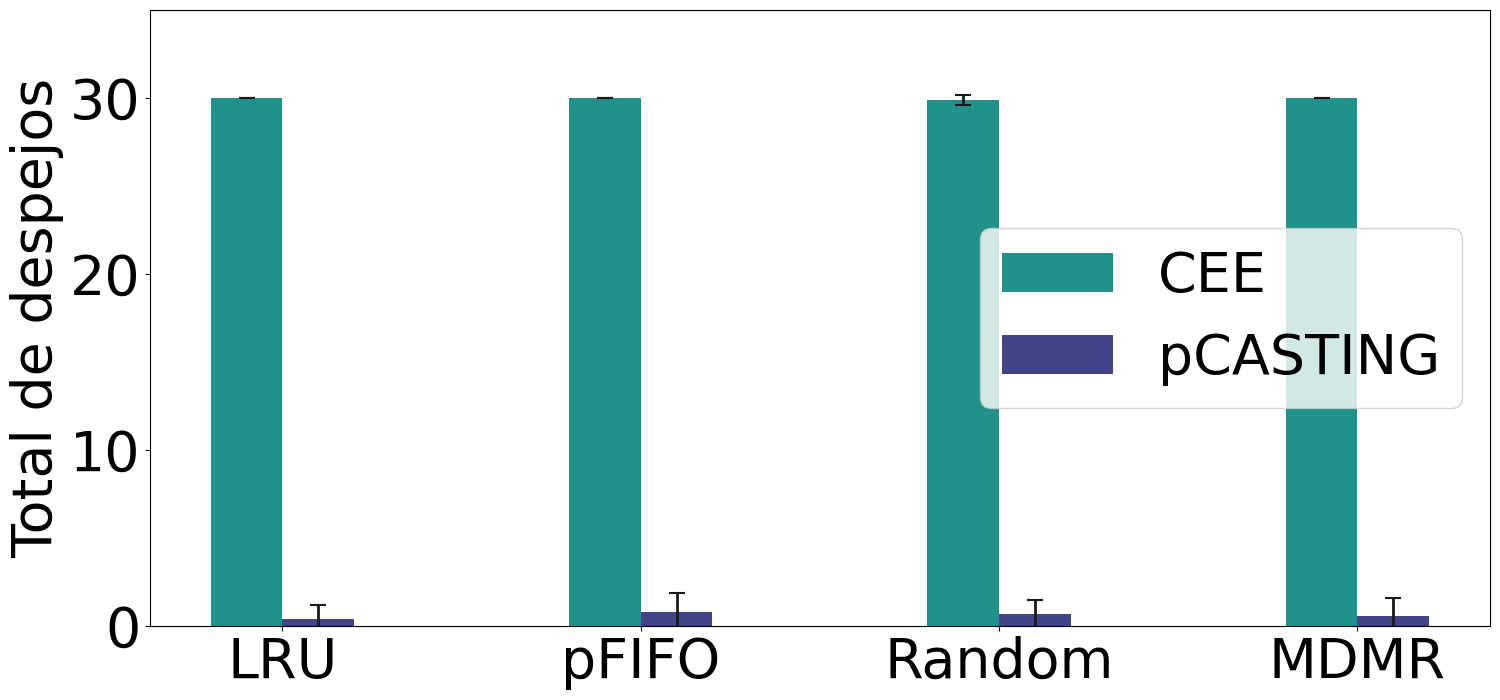

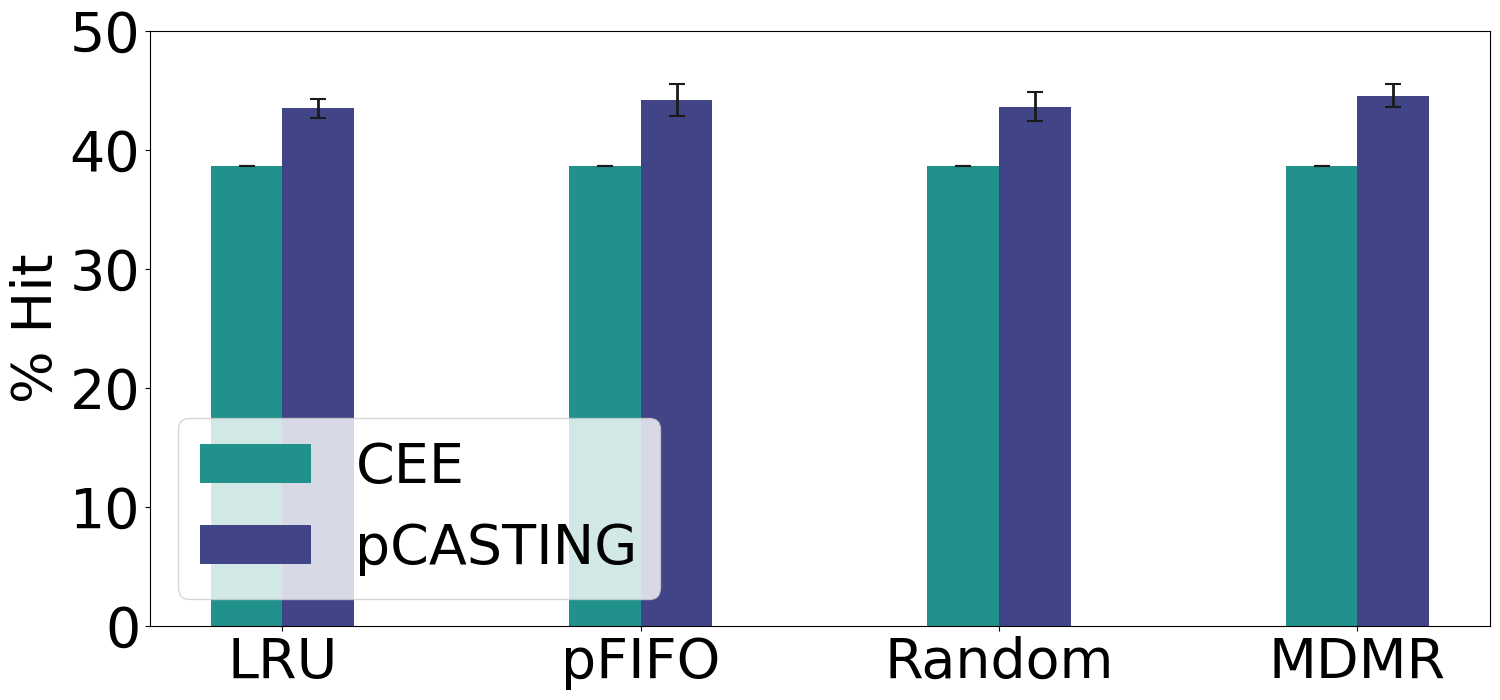

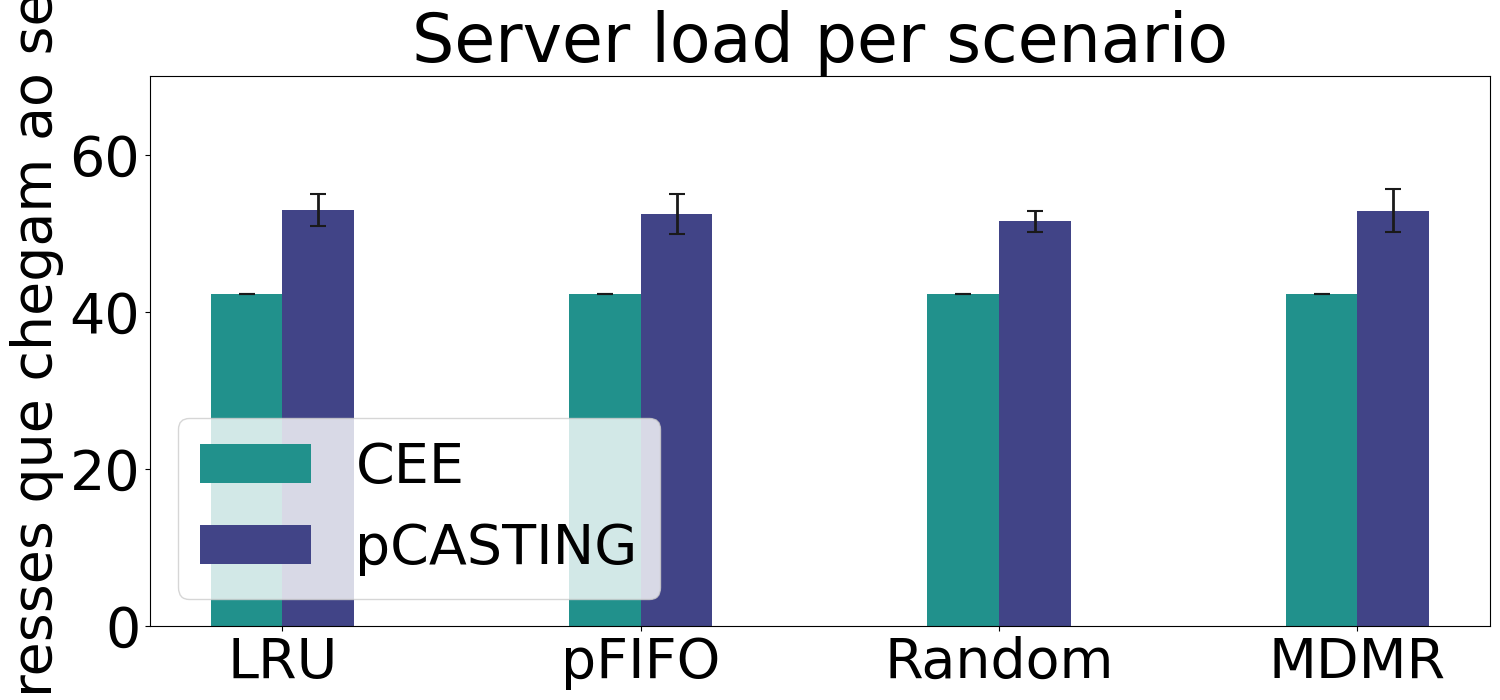

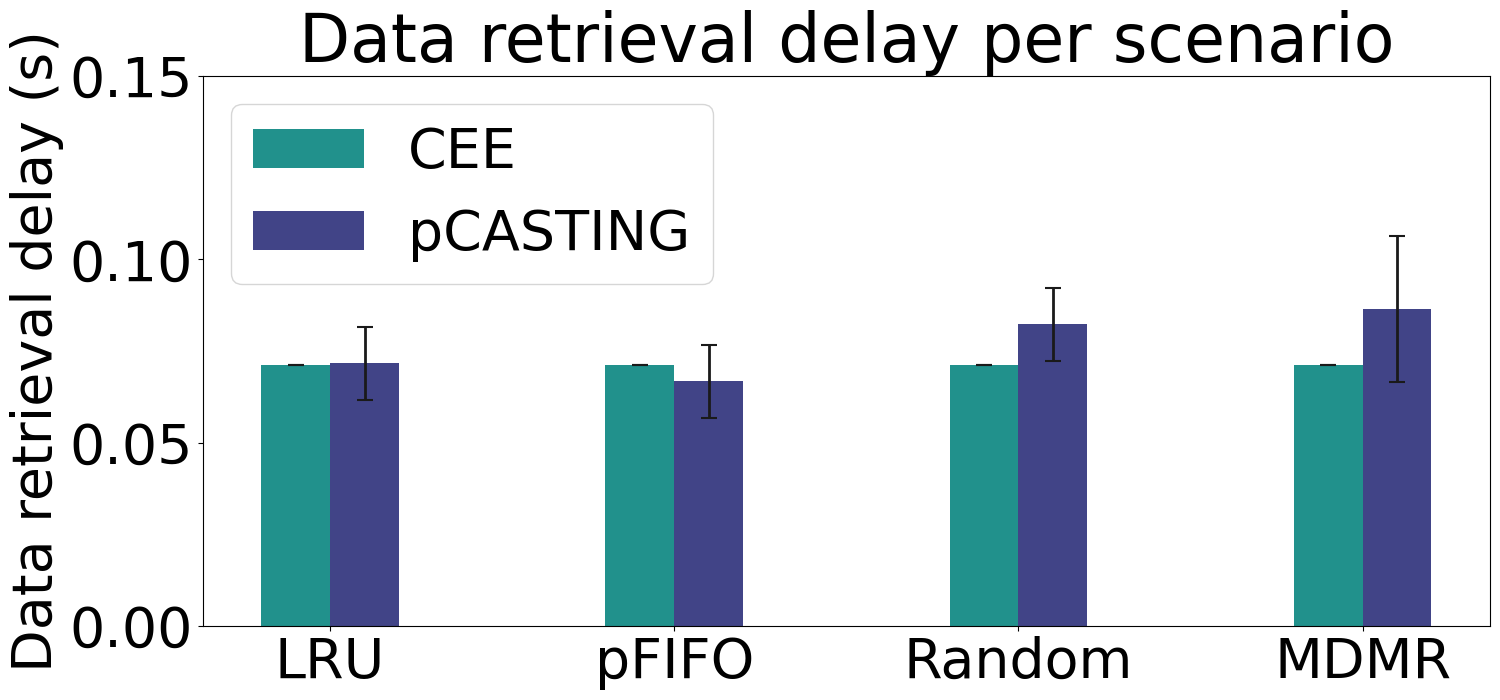

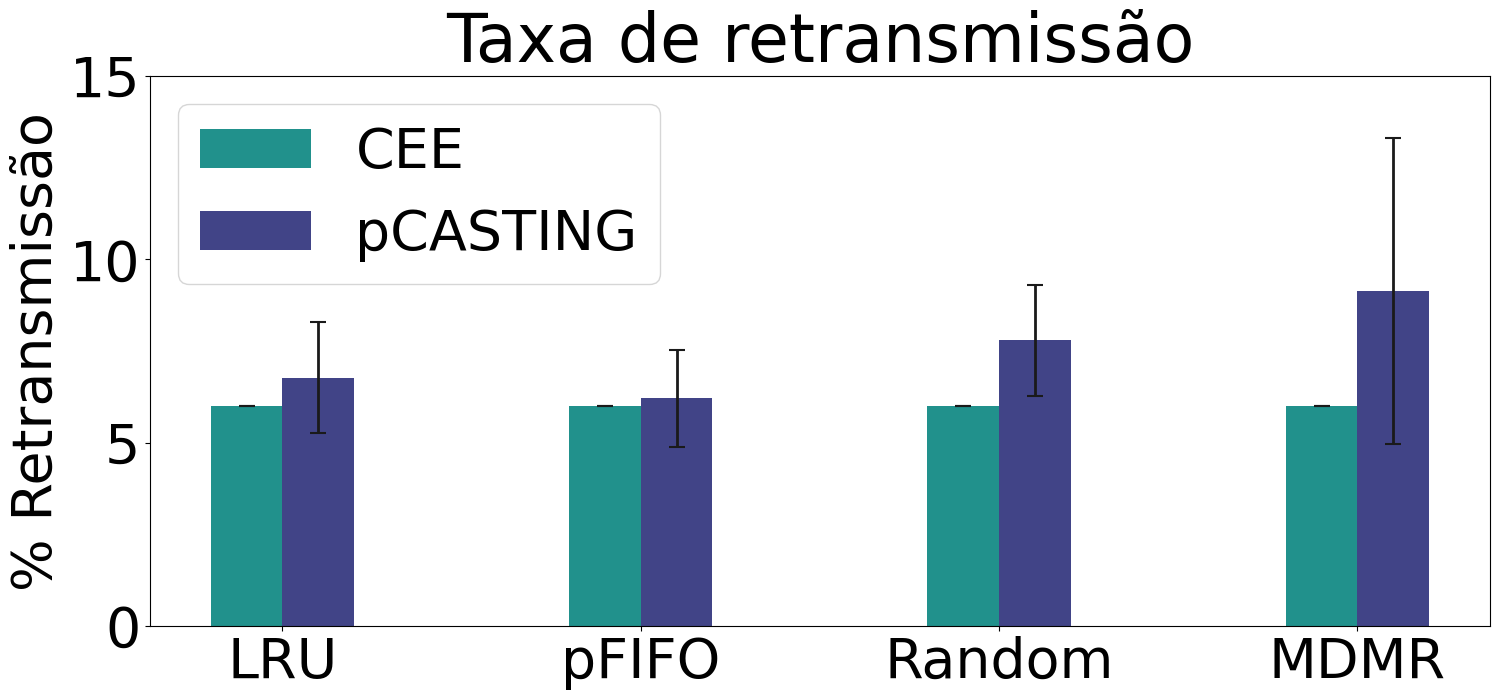

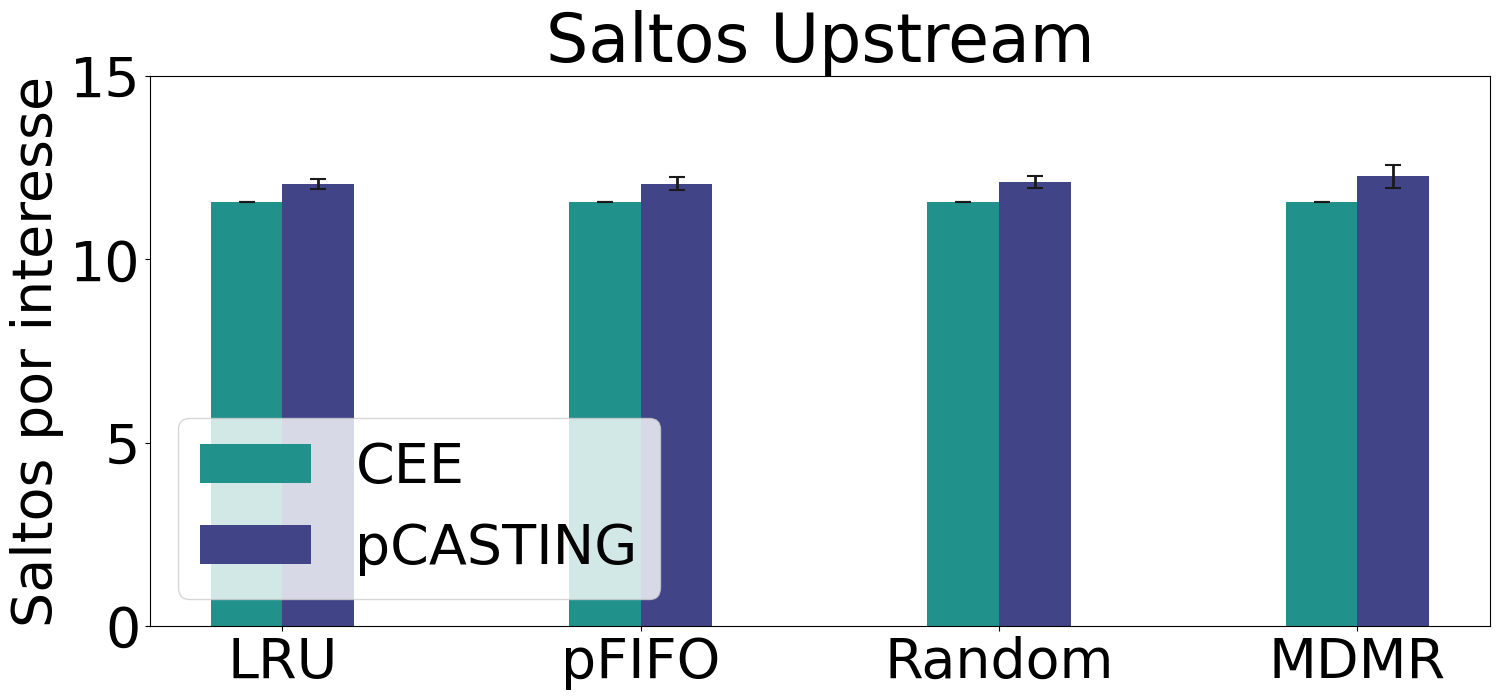

In [30]:
total_evictions2 = {
    "CEE": (averaged_dict["A"]["evictions"], averaged_dict["E"]["evictions"], averaged_dict["I"]["evictions"], averaged_dict["Y"]["evictions"]),
    "pCASTING": (averaged_dict["M"]["evictions"], averaged_dict["Q"]["evictions"], averaged_dict["U"]["evictions"], averaged_dict["ZC"]["evictions"])
}

hit_rate2 = {
    "CEE": (averaged_dict["A"]["hitratio"], averaged_dict["E"]["hitratio"], averaged_dict["I"]["hitratio"], averaged_dict["Y"]["hitratio"]),
    "pCASTING": (averaged_dict["M"]["hitratio"], averaged_dict["Q"]["hitratio"], averaged_dict["U"]["hitratio"], averaged_dict["ZC"]["hitratio"])
}

server_load_data2 = {
    "CEE": (averaged_dict["A"]["serverload"], averaged_dict["E"]["serverload"], averaged_dict["I"]["serverload"], averaged_dict["Y"]["serverload"]),
    "pCASTING": (averaged_dict["M"]["serverload"], averaged_dict["Q"]["serverload"], averaged_dict["U"]["serverload"], averaged_dict["ZC"]["serverload"])
}

delay_rate2 = {
    "CEE": (averaged_dict["A"]["retransmissiondelay"], averaged_dict["E"]["retransmissiondelay"], averaged_dict["I"]["retransmissiondelay"], averaged_dict["Y"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["M"]["retransmissiondelay"], averaged_dict["Q"]["retransmissiondelay"], averaged_dict["U"]["retransmissiondelay"], averaged_dict["ZC"]["retransmissiondelay"])
}

retransmission_rate2 = {
    "CEE": (averaged_dict["A"]["resendratio"], averaged_dict["E"]["resendratio"], averaged_dict["I"]["resendratio"], averaged_dict["Y"]["resendratio"]),
    "pCASTING": (averaged_dict["M"]["resendratio"], averaged_dict["Q"]["resendratio"], averaged_dict["U"]["resendratio"], averaged_dict["ZC"]["resendratio"])
}

hops_upstream_rate2 = {
    "CEE": (averaged_dict["A"]["hops_upstream"], averaged_dict["E"]["hops_upstream"], averaged_dict["I"]["hops_upstream"], averaged_dict["Y"]["hops_upstream"]),
    "pCASTING": (averaged_dict["M"]["hops_upstream"], averaged_dict["Q"]["hops_upstream"], averaged_dict["U"]["hops_upstream"], averaged_dict["ZC"]["hops_upstream"])
}

x = np.arange(len(policies))

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

# Gráfico 1
fig1, ax1 = plt.subplots(figsize=(16, 8))
rects1 = ax1.bar(x - width / 2, total_evictions2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['evictions'], error_kw=error_config)

ax1.set_ylim(0,35)
ax1.set_ylabel('Total de despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

fig1.tight_layout()
fig1.savefig('B_Despejos.png')

# Gráfico 2
fig2, ax2 = plt.subplots(figsize=(16, 8))
rects1 = ax2.bar(x - width / 2, hit_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

fig2.tight_layout()
fig2.savefig('B_Hit.png')

# Gráfico 3
fig3, ax3 = plt.subplots(figsize=(16, 8))
rects1 = ax3.bar(x - width / 2, server_load_data2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_title('Server load per scenario')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

fig3.tight_layout()
fig3.savefig('B_Carga.png')

# Gráfico 4
fig4, ax4 = plt.subplots(figsize=(16, 8))
rects1 = ax4.bar(x - width / 2, delay_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['retransmissiondelay'], error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['retransmissiondelay'], error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Data retrieval delay (s)')
ax4.set_title('Data retrieval delay per scenario')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

fig4.tight_layout()
fig4.savefig('B_Atraso.png')

# Gráfico 5
fig5, ax5 = plt.subplots(figsize=(16, 8))
rects1 = ax5.bar(x - width / 2, retransmission_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_title('Taxa de retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

fig5.tight_layout()
fig5.savefig('B_Retransmissao.png')

# Gráfico 6
fig6, ax6 = plt.subplots(figsize=(16, 8))
rects1 = ax6.bar(x - width / 2, hops_upstream_rate2["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S3']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_upstream_rate2["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S4']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos por interesse')
ax6.set_title('Saltos Upstream')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

fig6.tight_layout()
fig6.savefig('B_Saltos.png')

fig.tight_layout()

plt.show()

## Scenes C

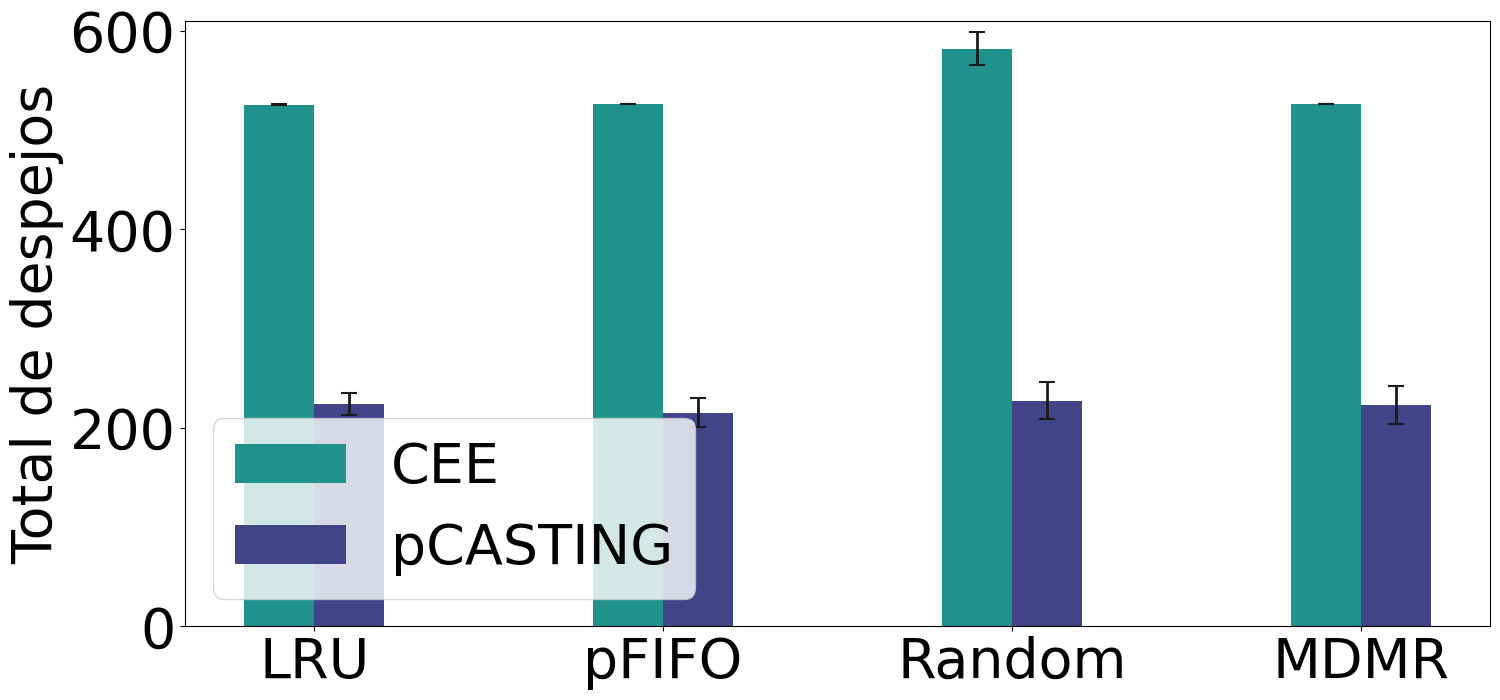

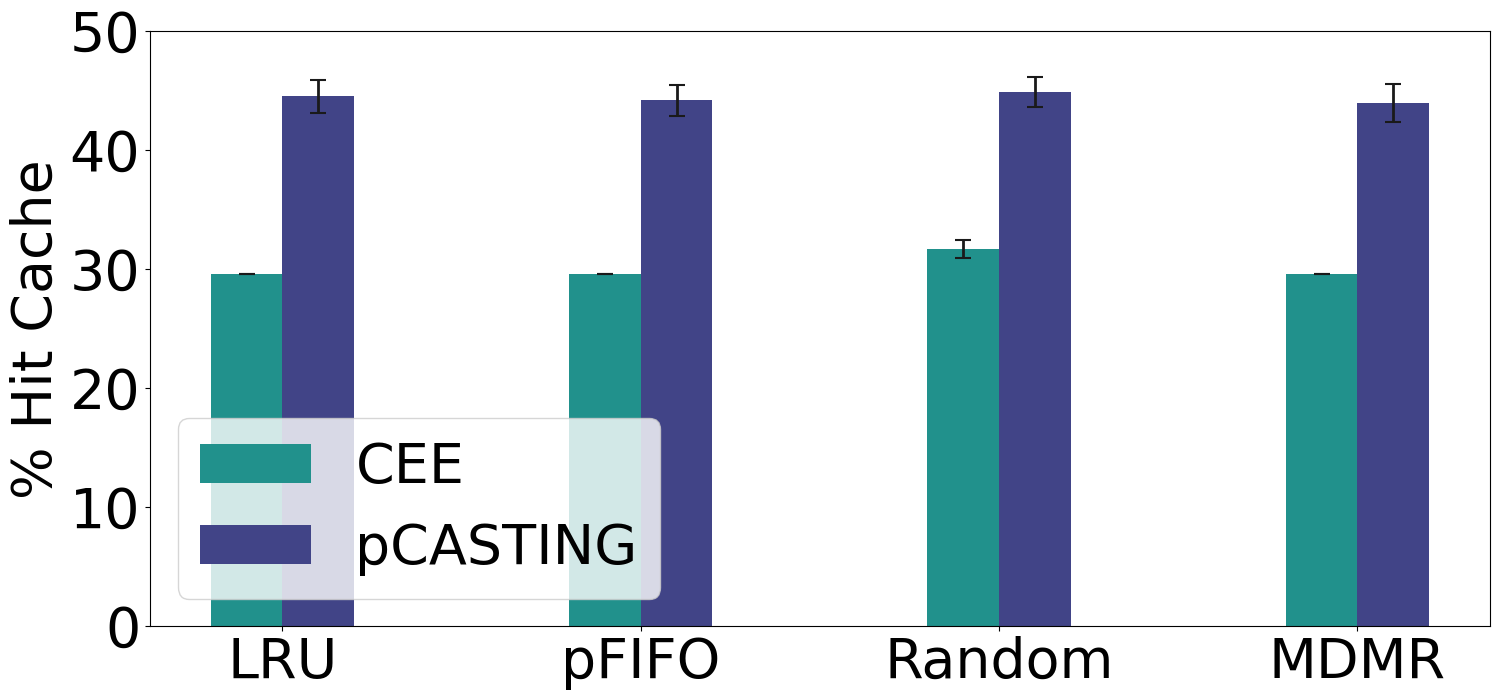

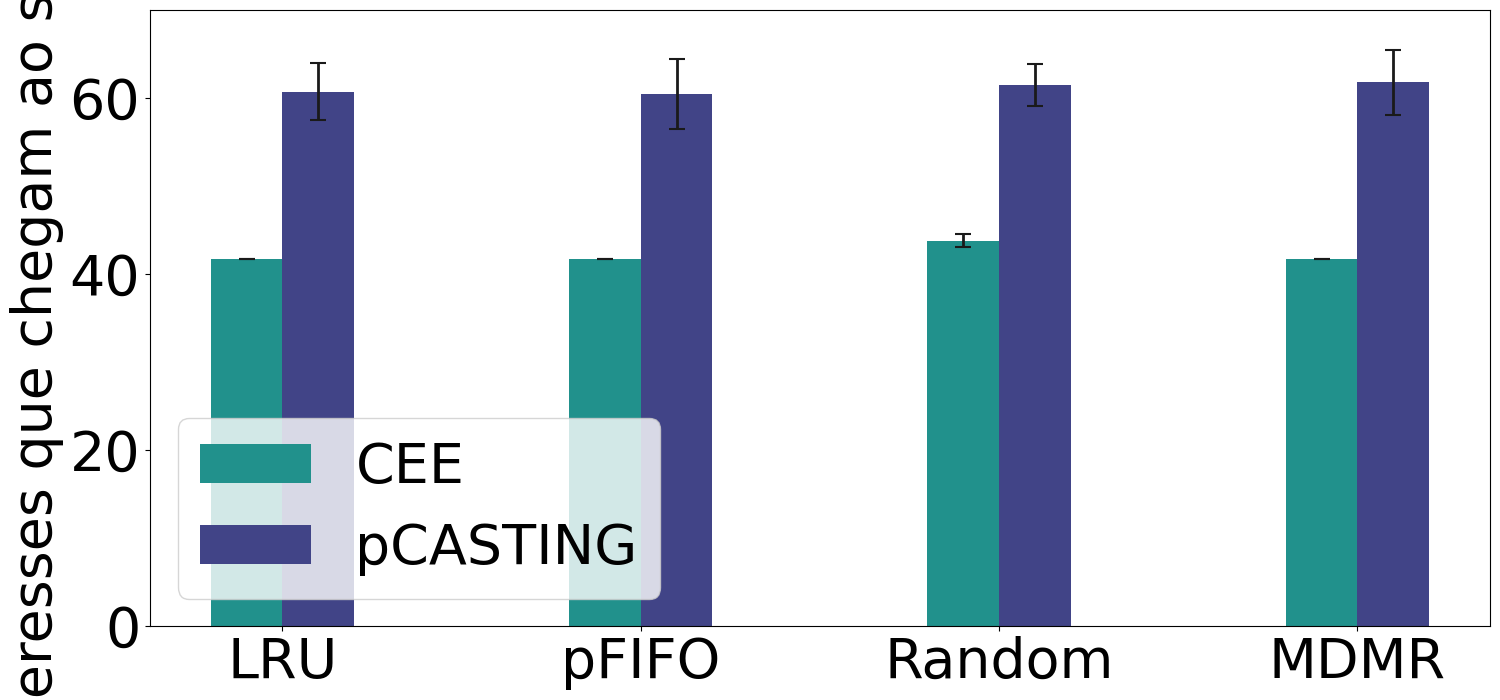

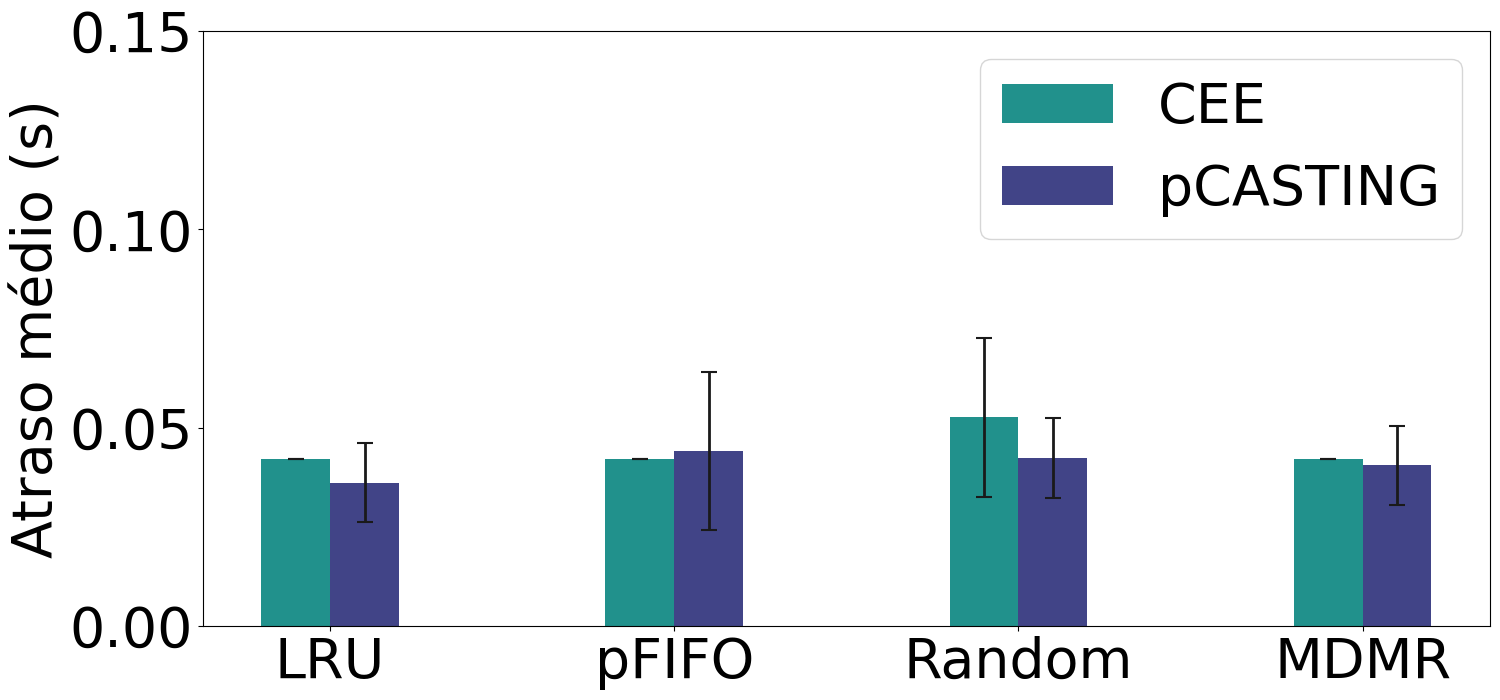

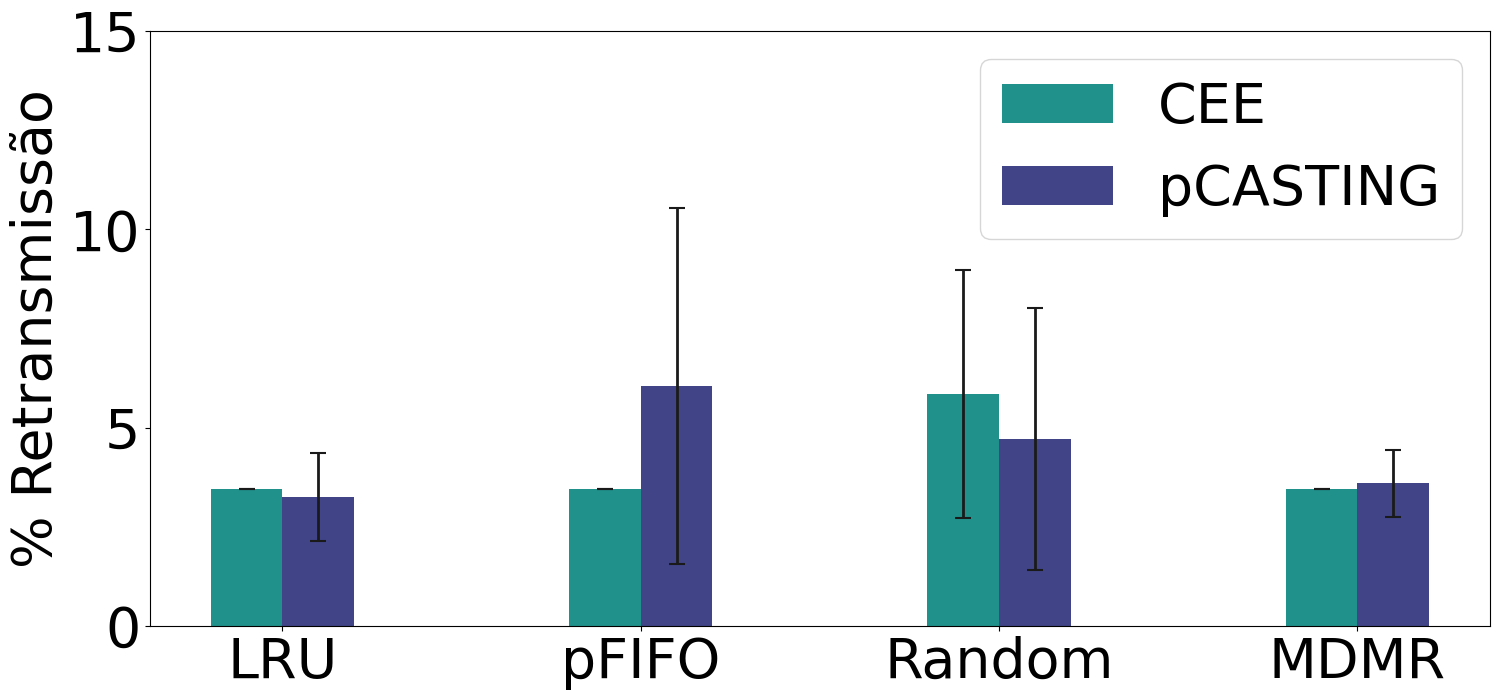

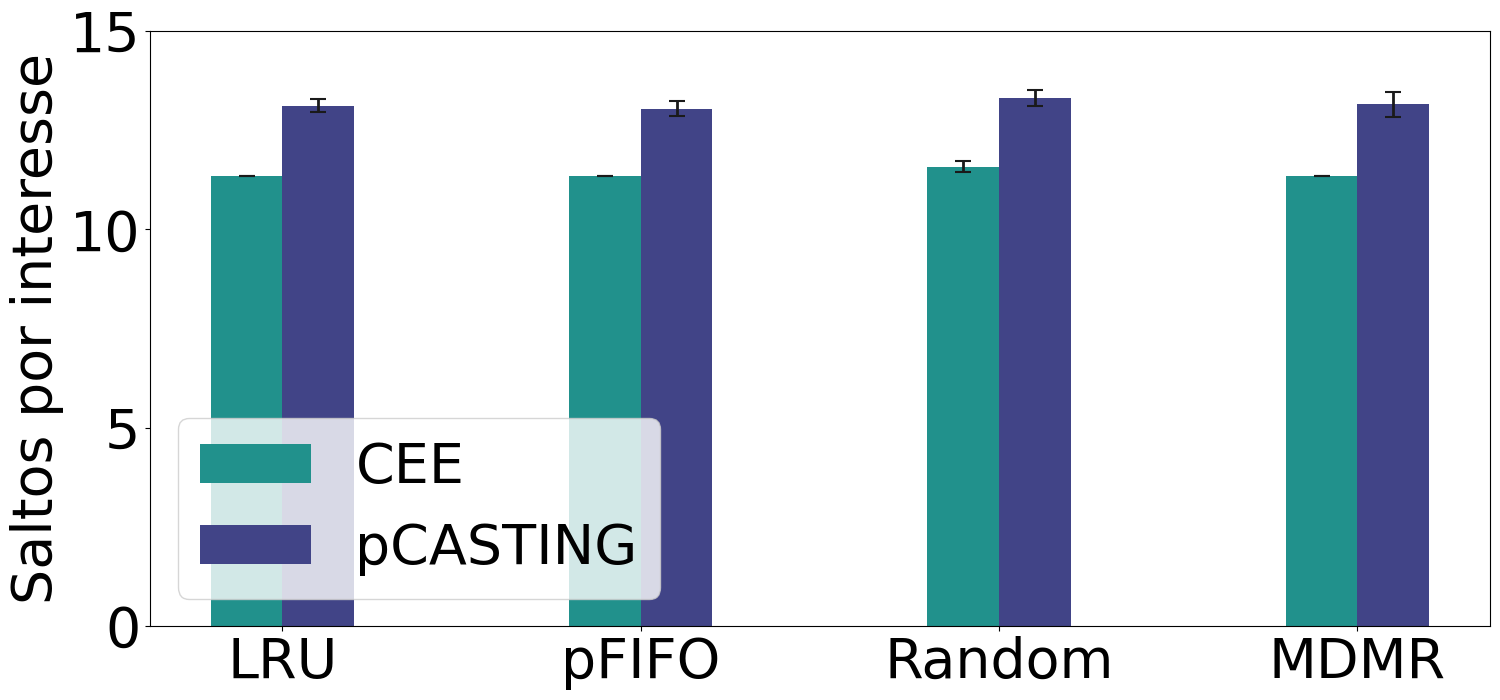

In [31]:
total_evictions3 = {
    "CEE": (averaged_dict["D"]["evictions"], averaged_dict["H"]["evictions"], averaged_dict["L"]["evictions"], averaged_dict["ZB"]["evictions"]),
    "pCASTING": (averaged_dict["P"]["evictions"], averaged_dict["T"]["evictions"], averaged_dict["X"]["evictions"], averaged_dict["ZF"]["evictions"])
}

hit_rate3 = {
    "CEE": (averaged_dict["D"]["hitratio"], averaged_dict["H"]["hitratio"], averaged_dict["L"]["hitratio"], averaged_dict["ZB"]["hitratio"]),
    "pCASTING": (averaged_dict["P"]["hitratio"], averaged_dict["T"]["hitratio"], averaged_dict["X"]["hitratio"], averaged_dict["ZF"]["hitratio"])
}

server_load_data3 = {
    "CEE": (averaged_dict["D"]["serverload"], averaged_dict["H"]["serverload"], averaged_dict["L"]["serverload"], averaged_dict["ZB"]["serverload"]),
    "pCASTING": (averaged_dict["P"]["serverload"], averaged_dict["T"]["serverload"], averaged_dict["X"]["serverload"], averaged_dict["ZF"]["serverload"])
}

delay_rate3 = {
    "CEE": (averaged_dict["D"]["retransmissiondelay"], averaged_dict["H"]["retransmissiondelay"], averaged_dict["L"]["retransmissiondelay"], averaged_dict["ZB"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["P"]["retransmissiondelay"], averaged_dict["T"]["retransmissiondelay"], averaged_dict["X"]["retransmissiondelay"], averaged_dict["ZF"]["retransmissiondelay"])
}

retransmission_rate3 = {
    "CEE": (averaged_dict["D"]["resendratio"], averaged_dict["H"]["resendratio"], averaged_dict["L"]["resendratio"], averaged_dict["ZB"]["resendratio"]),
    "pCASTING": (averaged_dict["P"]["resendratio"], averaged_dict["T"]["resendratio"], averaged_dict["X"]["resendratio"], averaged_dict["ZF"]["resendratio"])
}

hops_upstream_rate3 = {
    "CEE": (averaged_dict["D"]["hops_upstream"], averaged_dict["H"]["hops_upstream"], averaged_dict["L"]["hops_upstream"], averaged_dict["ZB"]["hops_upstream"]),
    "pCASTING": (averaged_dict["P"]["hops_upstream"], averaged_dict["T"]["hops_upstream"], averaged_dict["X"]["hops_upstream"], averaged_dict["ZF"]["hops_upstream"])
}

x = np.arange(len(policies))

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

# Gráfico 1
fig1, ax1 = plt.subplots(figsize=(16, 8))
rects1 = ax1.bar(x - width / 2, total_evictions3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['evictions'], error_kw=error_config)

ax1.set_ylim(0,610)
ax1.set_ylabel('Total de despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

fig1.tight_layout()
fig1.savefig('C_Despejos.png')

# Gráfico 2
fig2, ax2 = plt.subplots(figsize=(16, 8))
rects1 = ax2.bar(x - width / 2, hit_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit Cache')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

fig2.tight_layout()
fig2.savefig('C_Hit.png')

# Gráfico 3
fig3, ax3 = plt.subplots(figsize=(16, 8))
rects1 = ax3.bar(x - width / 2, server_load_data3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

fig3.tight_layout()
fig3.savefig('C_Carga.png')

# Gráfico 4
fig4, ax4 = plt.subplots(figsize=(16, 8))
rects1 = ax4.bar(x - width / 2, delay_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['retransmissiondelay'], error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['retransmissiondelay'], error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Atraso médio (s)')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

fig4.tight_layout()
fig4.savefig('C_Atraso.png')

# Gráfico 5
fig5, ax5 = plt.subplots(figsize=(16, 8))
rects1 = ax5.bar(x - width / 2, retransmission_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

fig5.tight_layout()
fig5.savefig('C_Retransmissao.png')

# Gráfico 6
fig6, ax6 = plt.subplots(figsize=(16, 8))
rects1 = ax6.bar(x - width / 2, hops_upstream_rate3["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S5']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_upstream_rate3["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S6']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos por interesse')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

fig6.tight_layout()
fig6.savefig('C_Saltos.png')
# Configura um título geral

fig.tight_layout()

plt.show()

## Scenes D

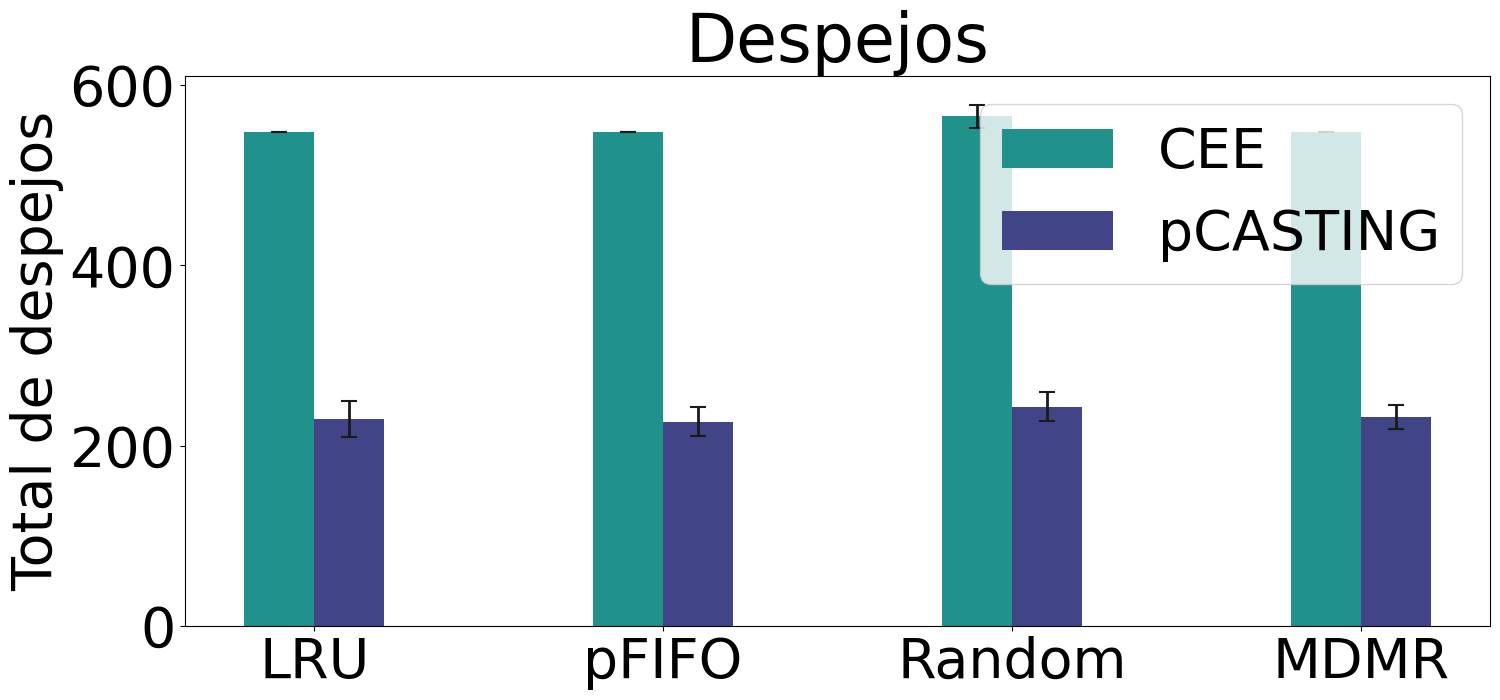

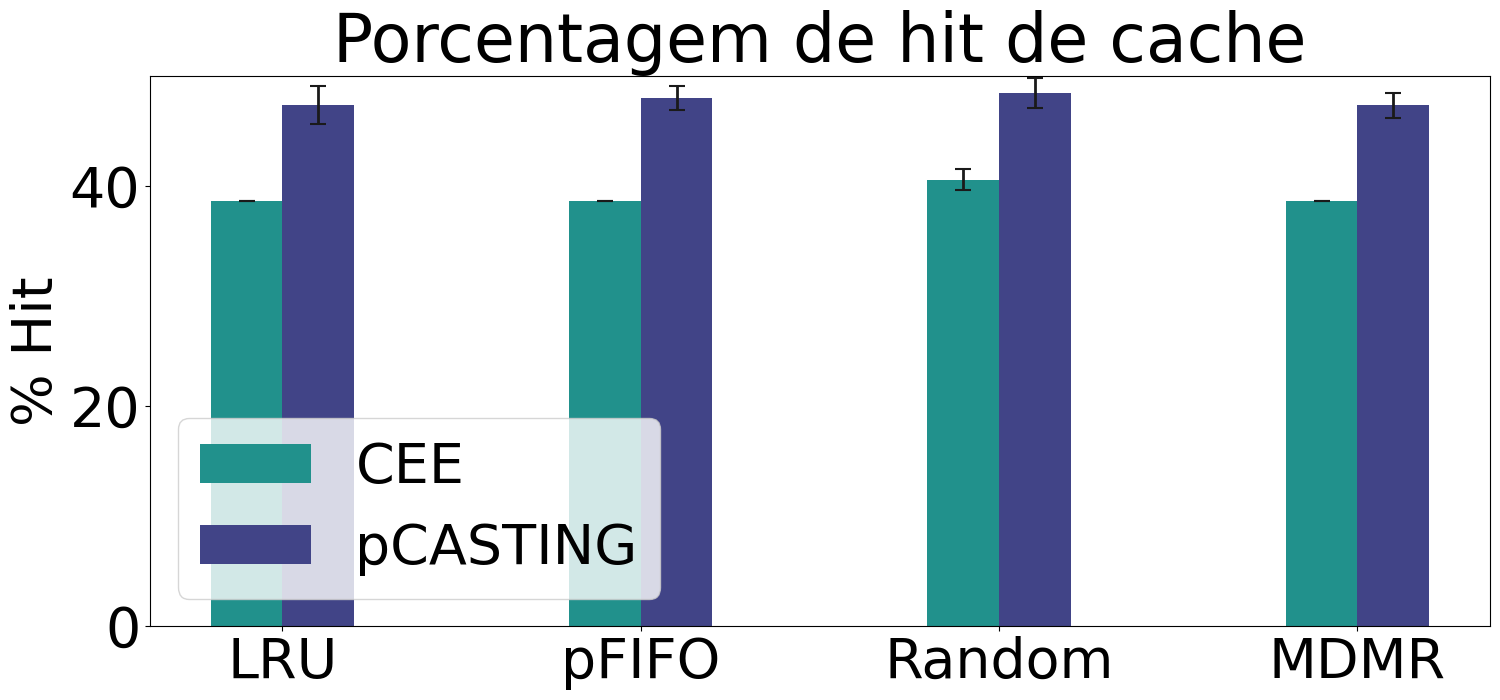

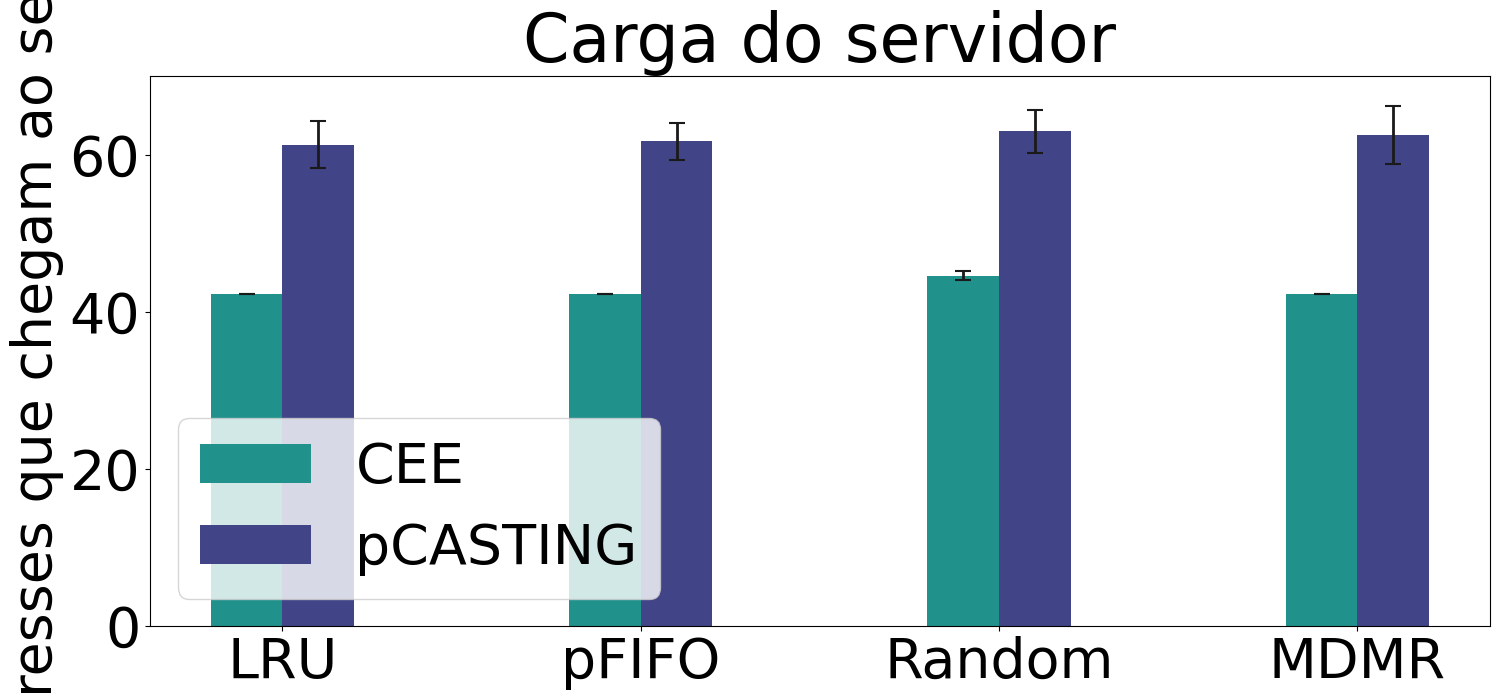

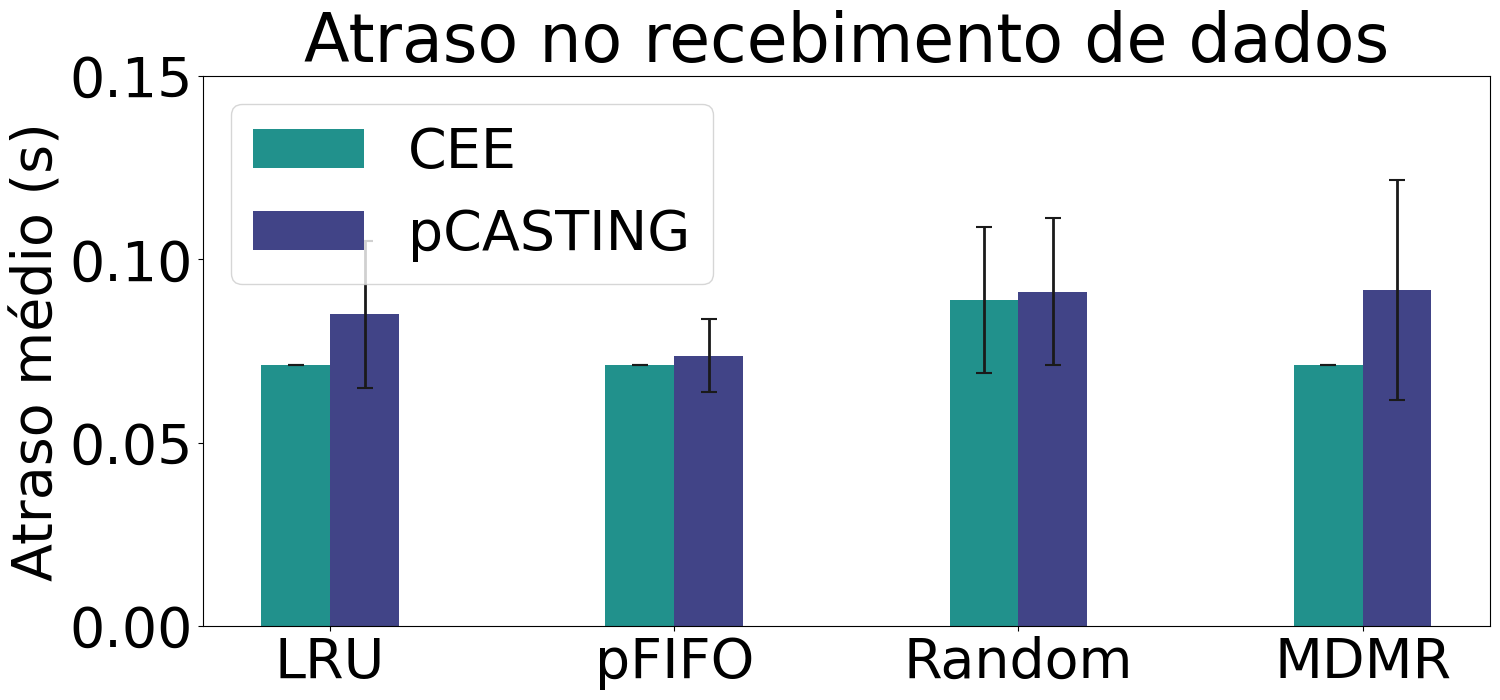

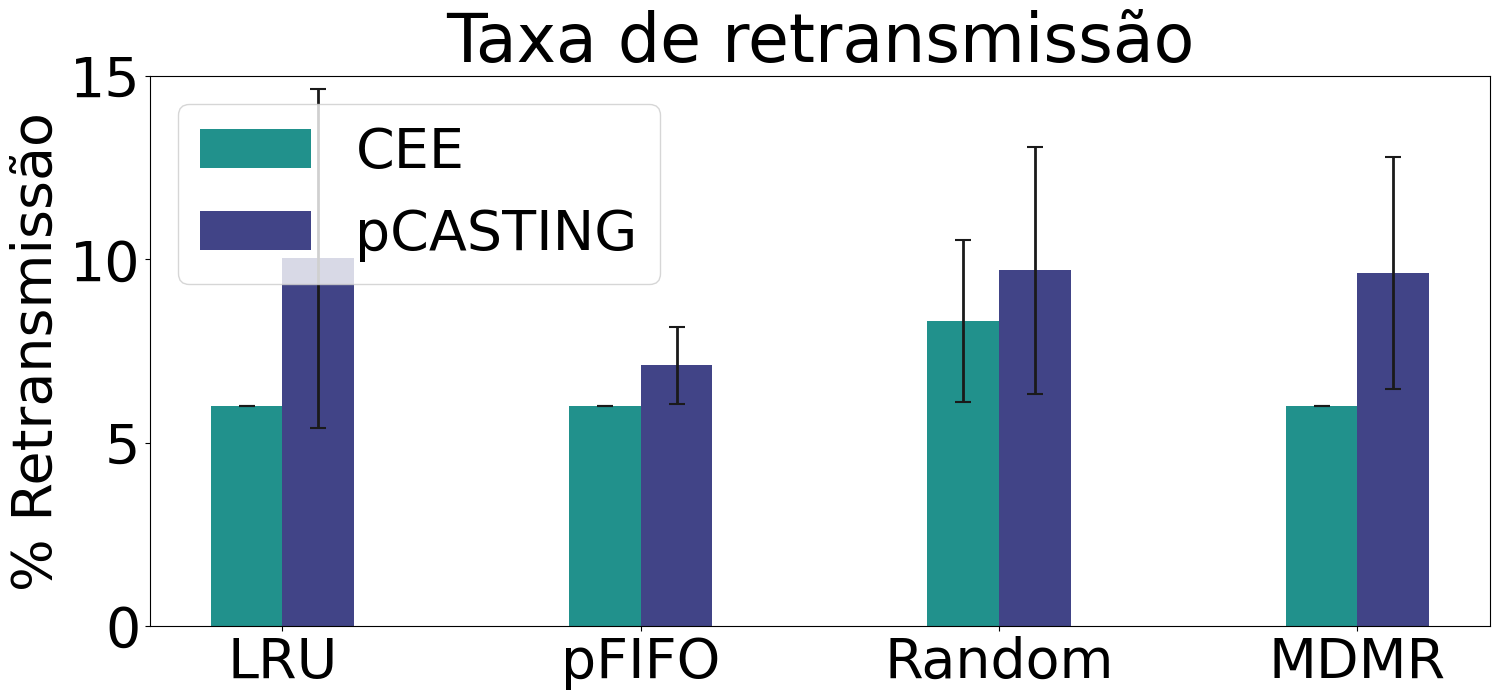

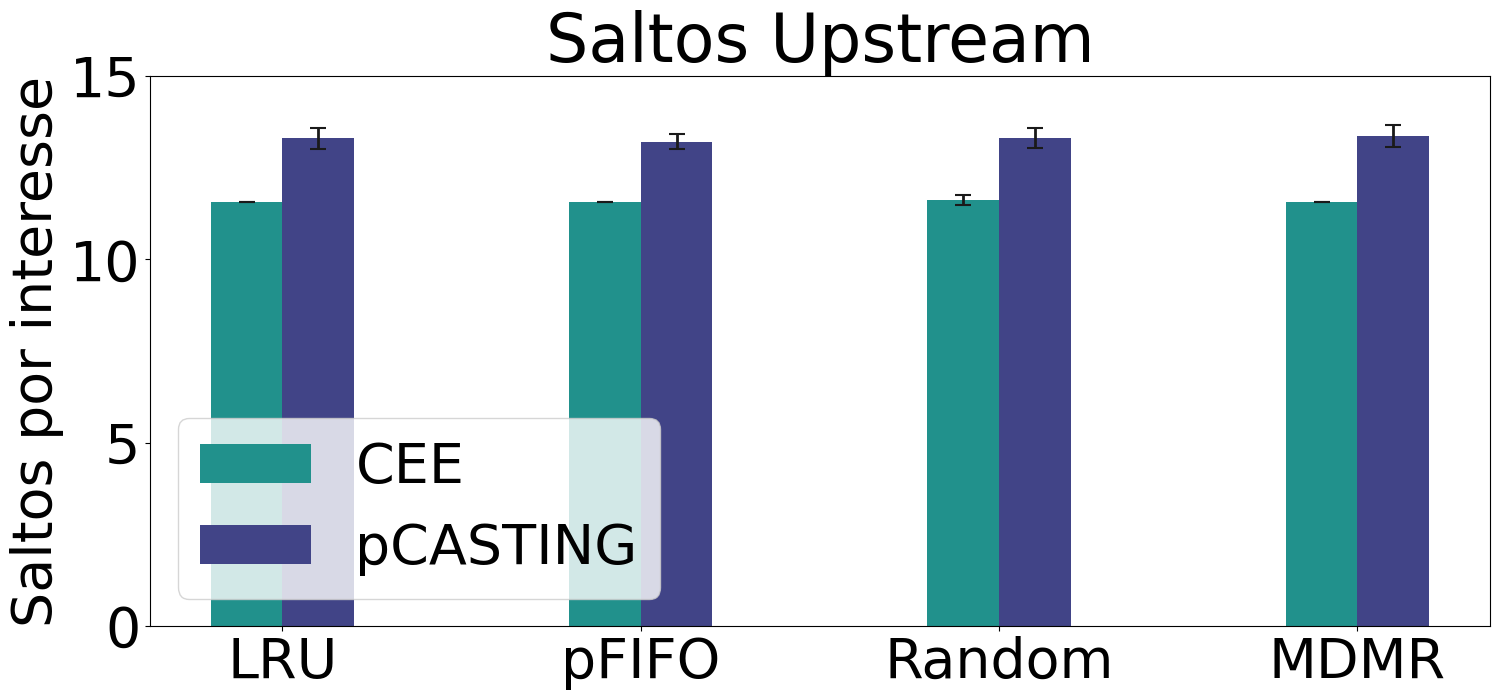

In [32]:
total_evictions4 = {
    "CEE": (averaged_dict["B"]["evictions"], averaged_dict["F"]["evictions"], averaged_dict["J"]["evictions"], averaged_dict["Z"]["evictions"]),
    "pCASTING": (averaged_dict["N"]["evictions"], averaged_dict["R"]["evictions"], averaged_dict["V"]["evictions"], averaged_dict["ZD"]["evictions"])
}

hit_rate4 = {
    "CEE": (averaged_dict["B"]["hitratio"], averaged_dict["F"]["hitratio"], averaged_dict["J"]["hitratio"], averaged_dict["Z"]["hitratio"]),
    "pCASTING": (averaged_dict["N"]["hitratio"], averaged_dict["R"]["hitratio"], averaged_dict["V"]["hitratio"], averaged_dict["ZD"]["hitratio"])
}

server_load_data4 = {
    "CEE": (averaged_dict["B"]["serverload"], averaged_dict["F"]["serverload"], averaged_dict["J"]["serverload"], averaged_dict["Z"]["serverload"]),
    "pCASTING": (averaged_dict["N"]["serverload"], averaged_dict["R"]["serverload"], averaged_dict["V"]["serverload"], averaged_dict["ZD"]["serverload"])
}

delay_rate4 = {
    "CEE": (averaged_dict["B"]["retransmissiondelay"], averaged_dict["F"]["retransmissiondelay"], averaged_dict["J"]["retransmissiondelay"], averaged_dict["Z"]["retransmissiondelay"]),
    "pCASTING": (averaged_dict["N"]["retransmissiondelay"], averaged_dict["R"]["retransmissiondelay"], averaged_dict["V"]["retransmissiondelay"], averaged_dict["ZD"]["retransmissiondelay"])
}

retransmission_rate4 = {
    "CEE": (averaged_dict["B"]["resendratio"], averaged_dict["F"]["resendratio"], averaged_dict["J"]["resendratio"], averaged_dict["Z"]["resendratio"]),
    "pCASTING": (averaged_dict["N"]["resendratio"], averaged_dict["R"]["resendratio"], averaged_dict["V"]["resendratio"], averaged_dict["ZD"]["resendratio"])
}

hops_upstream_rate4 = {
    "CEE": (averaged_dict["B"]["hops_upstream"], averaged_dict["F"]["hops_upstream"], averaged_dict["J"]["hops_upstream"], averaged_dict["Z"]["hops_upstream"]),
    "pCASTING": (averaged_dict["N"]["hops_upstream"], averaged_dict["R"]["hops_upstream"], averaged_dict["V"]["hops_upstream"], averaged_dict["ZD"]["hops_upstream"])
}

x = np.arange(len(policies))

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))
width = 0.2

# Gráfico 1
fig1, ax1 = plt.subplots(figsize=(16, 8))
rects1 = ax1.bar(x - width / 2, total_evictions4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['evictions'], error_kw=error_config)
rects2 = ax1.bar(x + width / 2, total_evictions4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['evictions'], error_kw=error_config)

ax1.set_ylim(0,610)
ax1.set_ylabel('Total de despejos')
ax1.set_title('Despejos')
ax1.set_xticks(x)
ax1.set_xticklabels(policies)
ax1.legend()

fig1.tight_layout()
fig1.savefig('D_Despejos.png')

# Gráfico 2
fig2, ax2 = plt.subplots(figsize=(16, 8))
rects1 = ax2.bar(x - width / 2, hit_rate4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['hitratio'], error_kw=error_config)
rects2 = ax2.bar(x + width / 2, hit_rate4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['hitratio'], error_kw=error_config)

ax2.set_ylim(0,50)
ax2.set_ylabel('% Hit')
ax2.set_title('Porcentagem de hit de cache')
ax2.set_xticks(x)
ax2.set_xticklabels(policies)
ax2.legend()

fig2.tight_layout()
fig2.savefig('D_Hit.png')

# Gráfico 3
fig3, ax3 = plt.subplots(figsize=(16, 8))
rects1 = ax3.bar(x - width / 2, server_load_data4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['serverload'], error_kw=error_config)
rects2 = ax3.bar(x + width / 2, server_load_data4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['serverload'], error_kw=error_config)

ax3.set_ylim(0,70)
ax3.set_ylabel('% Interesses que chegam ao servidor')
ax3.set_title('Carga do servidor')
ax3.set_xticks(x)
ax3.set_xticklabels(policies)
ax3.legend()

fig3.tight_layout()
fig3.savefig('D_Carga.png')

# Gráfico 4
fig4, ax4 = plt.subplots(figsize=(16, 8))
rects1 = ax4.bar(x - width / 2, delay_rate4["CEE"], width, yerr=g_devp['S7']['retransmissiondelay'], label='CEE', color=plt.cm.viridis(0.5), error_kw=error_config)
rects2 = ax4.bar(x + width / 2, delay_rate4["pCASTING"], width, yerr=g_devp['S8']['retransmissiondelay'], label='pCASTING', color=plt.cm.viridis(0.2), error_kw=error_config)

ax4.set_ylim(0,0.15)
ax4.set_ylabel('Atraso médio (s)')
ax4.set_title('Atraso no recebimento de dados')
ax4.set_xticks(x)
ax4.set_xticklabels(policies)
ax4.legend()

fig4.tight_layout()
fig4.savefig('D_Atraso.png')

# Gráfico 5
fig5, ax5 = plt.subplots(figsize=(16, 8))
rects1 = ax5.bar(x - width / 2, retransmission_rate4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['resendratio'], error_kw=error_config)
rects2 = ax5.bar(x + width / 2, retransmission_rate4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['resendratio'], error_kw=error_config)

ax5.set_ylim(0,15)
ax5.set_ylabel('% Retransmissão')
ax5.set_title('Taxa de retransmissão')
ax5.set_xticks(x)
ax5.set_xticklabels(policies)
ax5.legend()

fig5.tight_layout()
fig5.savefig('D_Retransmissao.png')

# Gráfico 6
fig6, ax6 = plt.subplots(figsize=(16, 8))
rects1 = ax6.bar(x - width / 2, hops_upstream_rate4["CEE"], width, label='CEE', color=plt.cm.viridis(0.5), yerr=g_devp['S7']['hops_upstream'], error_kw=error_config)
rects2 = ax6.bar(x + width / 2, hops_upstream_rate4["pCASTING"], width, label='pCASTING', color=plt.cm.viridis(0.2), yerr=g_devp['S8']['hops_upstream'], error_kw=error_config)

ax6.set_ylim(0,15)
ax6.set_ylabel('Saltos por interesse')
ax6.set_title('Saltos Upstream')
ax6.set_xticks(x)
ax6.set_xticklabels(policies)
ax6.legend()

fig6.tight_layout()
fig6.savefig('D_Saltos.png')

# Configura um título geral

fig.tight_layout()

plt.show()